In [1]:
import warnings
warnings.filterwarnings('ignore')

# <font color = 'blue'>1. Introduction <font color = 'blue'>

## <font color = 'blue'>1.1 Understanding Stock Market </font>

<font color = 'black'>**1. Stock Market :**  
A Stock market or Share Market is the aggregation of buyers and sellers of stocks which represent ownership claims on business. Investment in the stock market is most often done via [stockbrokerages](https://en.wikipedia.org/wiki/Stockbroker) and [electronic trading platforms] (https://en.wikipedia.org/wiki/Electronic_trading_platform). Investments is usually made with an investment strategy in mind.
​
Every investor looks for a profit by buying stocks with low price and selling those stocks with high price. The price of stock usually depends on supply demand gap. Following points illustarate how the price of stocks changes.  
1. If more number of buyers want to buy a share than the more number of sellers selling, then sellers are in control then they can fix the price of the stock.
2. If number of buyers are less than the number of sellers, then buyers are in control and the can fix the price.<br>  

**2. Stock Index :**  
A Stock index or stock market index, is an index that measures a stock market or a subset of the stock market, that helps investors compare curretn price levels with past prices to calculate market performance.  
​
The major stock indices in usa are:  
a) [Nasdaq composite](https://en.wikipedia.org/wiki/NASDAQ_Composite)  
b) [S&p 500](https://en.wikipedia.org/wiki/S%26P_500_Index)  
c) [DJIA](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)  
​
The major stock market indices in india are:  
a) [BSE Sensex](https://en.wikipedia.org/wiki/BSE_SENSEX)  
b) [NSE Nifty](https://en.wikipedia.org/wiki/NIFTY_50)  
​
You can understand more about stock market [here](https://www.youtube.com/watch?v=ZCFkWDdmXG8). </font>

## <font color = 'blue'> 1.2 Problem Description </font>

<font color = 'black'>  
Every stock market index contains low, high, open, closing prices of every day stock prices.  
**LOW:** low indicates the lowest price of the stock on that day.  
**HIGH:** High indicates the highest price of the stock on that day.  
**Open:** Open indicates the opening price of the stock on that day.  
**Close:** Close indicates the closing price of the stock on that day.  

If closig price is greater than selling price then it means sellers are in control. Otherwise, buyers are in control.  

**The main objective in my problem is to predict the whether buyers are in control or sellers or in control in the next day** </font> 

## <font color = 'blue'>1.3 Dataset description </font>

<font color = 'black'>  
There are two types of datasets are there:  
1. The First dataset contains the average stock price of DJIA between 2008-06-08 to 2016-07-01. And the corresponding top 25 news headlines from reddit on every day of these dates.  
[Click here for the dataset](https://www.kaggle.com/aaron7sun/stocknews)  
2. The second dataset contains the stock price of Microsoft in between March 10th, 2014 to August 10th 2014. And the different categorical news headlines from these dates. Categories include business, science and technology, entertainment, and health.  
[Click here for the dataset](https://www.kaggle.com/uciml/news-aggregator-dataset)
</font>

# <font color = 'blue'> 2. Problem Formulation </font>

There are 3 ways the problem can be formulated from the given dataset  

**By Using first dataset**
1. By modelling top25 news and today's stock prices with tomorrow's class labels (buyers or sellers control).  
2. By modelling each news from top25 news and toady's stock prices with tomorrow's class label.  

**By Using second dataset**  
1. By modelling only the technolgy news which are related with microsft with the class label.  

# <font color = 'blue'> 3. Working on the problem </font>

In [97]:
#imports

import tensorflow as tf
from prettytable import PrettyTable
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy import stats
# gloabl params for all matplotlib plots
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import tensorflow.keras.backend as K
from datetime import datetime
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 

from pandas.plotting import autocorrelation_plot

# LSTM and CNN for sequence classification in the IMDB dataset
import numpy
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.preprocessing.text import Tokenizer
from keras.callbacks.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.callbacks.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import load_model
from os.path import isfile
import os
from keras.optimizers import Adam
import pickle

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
#from unidecode import unidecode
from keras.utils.np_utils import to_categorical
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model

import datetime as dt
from wordcloud import WordCloud, STOPWORDS

tf.random.set_seed(1)

## <font color = 'blue'>3.1 Understanding First Dataset </font>

In [3]:
data_path = '../DataSet/'
raw_data_djia = pd.read_csv(data_path + 'DJIA/upload_DJIA_table.csv')
raw_data_djia["Date"] = pd.to_datetime(raw_data_djia["Date"])    #converting to datetime object
print("Top 5 rows of the dataset:")
raw_data_djia.head()

Top 5 rows of the dataset:


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
raw_data_news = pd.read_csv(data_path + 'DJIA/Combined_News_DJIA.csv')
raw_data_news["Date"] = pd.to_datetime(raw_data_news["Date"])    #converting to datetime object
print("Top 5 rows of the dataset:")
raw_data_news.head()

Top 5 rows of the dataset:


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
raw_data_djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1989 non-null   datetime64[ns]
 1   Open       1989 non-null   float64       
 2   High       1989 non-null   float64       
 3   Low        1989 non-null   float64       
 4   Close      1989 non-null   float64       
 5   Volume     1989 non-null   int64         
 6   Adj Close  1989 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 108.9 KB


In [6]:
raw_data_news.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
print('start date in the djia dataset:', raw_data_djia['Date'].min())
print('end date in the djia dataset:', raw_data_news['Date'].max())

start date in the djia dataset: 2008-08-08 00:00:00
end date in the djia dataset: 2016-07-01 00:00:00


## <font color = 'blue'>3.2 Observations </font>

1. The dataset contains the 1989 observations. 
2. Start date of the series is at 2008-08-08 and the end date of the series is 2016-07-01. 
3. The dataset also containes Top 25 news headlines for every date in `raw_data_news` dataframe.  

# <font color = 'blue'> 4. Descriptive Analysis </font>

In [8]:
for column in raw_data_djia.columns:
    print("Descriptive statistics of " + column + ":")
    print(raw_data_djia[column].describe())
    print('=======================\n')

Descriptive statistics of Date:
count                    1989
unique                   1989
top       2015-11-20 00:00:00
freq                        1
first     2008-08-08 00:00:00
last      2016-07-01 00:00:00
Name: Date, dtype: object

Descriptive statistics of Open:
count     1989.000000
mean     13459.116048
std       3143.281634
min       6547.009766
25%      10907.339844
50%      13022.049805
75%      16477.699219
max      18315.060547
Name: Open, dtype: float64

Descriptive statistics of High:
count     1989.000000
mean     13541.303173
std       3136.271725
min       6709.609863
25%      11000.980469
50%      13088.110352
75%      16550.070312
max      18351.359375
Name: High, dtype: float64

Descriptive statistics of Low:
count     1989.000000
mean     13372.931728
std       3150.420934
min       6469.950195
25%      10824.759766
50%      12953.129883
75%      16392.769531
max      18272.560547
Name: Low, dtype: float64

Descriptive statistics of Close:
count     1989.000000


In [9]:
raw_data_djia.index = raw_data_djia['Date'] #giving index as 'Date' column.
raw_data_djia = raw_data_djia.drop('Date', axis = 1).copy() #dropping the 'Date' column after assigning it as index
raw_data_djia_copy = raw_data_djia.sort_index() #sort the dataframe with index such that the stocks are sorted

### <font color = 'blue'>4.1  Discretising the stock prices </font>

1. Since, the problem is classfication and the stock prices are increasing with time. It's better if we discritise the stock prices.  
2. The best way to descritise the stock prices is by using getting the stock mvoement form the previous day `closing price`.  
3. The output class label is that whether today `buyers` are in control or `sellers` are in control.  
4. Buyers are in control if **today's closing price is less than the selling price** otherwise it's sellers are in control.  

In [10]:
# initialising the variables for discritising stock prices
raw_data_djia_copy['move_close'] = ['N/A'] * raw_data_djia_copy.shape[0]
raw_data_djia_copy['move_open'] = ['N/A'] * raw_data_djia_copy.shape[0]
raw_data_djia_copy['move_high'] = ['N/A'] * raw_data_djia_copy.shape[0]
raw_data_djia_copy['move_low'] = ['N/A'] * raw_data_djia_copy.shape[0]


# intialsing variable for class label
raw_data_djia_copy['move_close_open'] = ['N/A']*raw_data_djia_copy.shape[0]

In [11]:
#observing the dataframe after intialising
raw_data_djia_copy.head() 

,Open,High,Low,Close,Volume,Adj Close,move_close,move_open,move_high,move_low,move_close_open
Date,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,N/A,N/A,N/A,N/A,N/A
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,N/A,N/A,N/A,N/A,N/A
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,N/A,N/A,N/A,N/A,N/A
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,N/A,N/A,N/A,N/A,N/A
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,N/A,N/A,N/A,N/A,N/A


In [12]:
#Class label creating
for index in range(raw_data_djia_copy.shape[0]):
    # checking whether close price is greater tha open price or not
    if raw_data_djia_copy['Close'][index] >= raw_data_djia_copy['Open'][index]:
        raw_data_djia_copy['move_close_open'][index] = 'SellersControl'
    else:
        raw_data_djia_copy['move_close_open'][index] = 'BuyersControl'

# Creating the discritised features
for index in range(raw_data_djia_copy.shape[0]):
    if index == 0:
        continue
    elif raw_data_djia_copy['Close'][index] >= raw_data_djia_copy['Close'][index-1]:
        raw_data_djia_copy['move_close'][index] = 'Increased'
    else:
        raw_data_djia_copy['move_close'][index] = 'Decreased'

        
for index in range(raw_data_djia_copy.shape[0]):
    if index == 0:
        continue
        
    elif raw_data_djia_copy['Open'][index] >= raw_data_djia_copy['Close'][index-1]:
        raw_data_djia_copy['move_open'][index] = 'Increased'
        
    else:
        raw_data_djia_copy['move_open'][index] = 'Decreased'

for index in range(raw_data_djia_copy.shape[0]):
    if index == 0:
        continue
        
    elif raw_data_djia_copy['High'][index] >= raw_data_djia_copy['Close'][index-1]:
        raw_data_djia_copy['move_high'][index] = 'Increased'
        
    else:
        raw_data_djia_copy['move_high'][index] = 'Decreased'

for index in range(raw_data_djia_copy.shape[0]):
    if index == 0:
        continue
        
    elif raw_data_djia_copy['Low'][index] >= raw_data_djia_copy['Close'][index-1]:
        raw_data_djia_copy['move_low'][index] = 'Increased'
    else:
        raw_data_djia_copy['move_low'][index] = 'Decreased'


In [13]:
#obserivng the dataframe after discritising the continuos variables
raw_data_djia_copy.head(10)

,Open,High,Low,Close,Volume,Adj Close,move_close,move_open,move_high,move_low,move_close_open
Date,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,N/A,N/A,N/A,N/A,SellersControl
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Increased,Decreased,Increased,Decreased,SellersControl
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Decreased,Decreased,Increased,Decreased,BuyersControl
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,Decreased,Decreased,Decreased,Decreased,BuyersControl
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,Increased,Decreased,Increased,Decreased,SellersControl
2008-08-15,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391,Increased,Decreased,Increased,Decreased,SellersControl
2008-08-18,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648,Decreased,Decreased,Increased,Decreased,BuyersControl
2008-08-19,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805,Decreased,Decreased,Decreased,Decreased,BuyersControl
2008-08-20,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688,Increased,Decreased,Increased,Decreased,SellersControl


## <font color = 'blue'> 4.2 Displaying distribution of each variable </font>

In [14]:
#https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot
def without_hue(plot, feature1):
    """
    This function labels the percentage on count plots
    
    parameters:
        plot(plot object): matplotlib plot object
        feature1(array): array of counts
    
    returns:
        doesn't return anything but annotates the percentage on count plot
    
    """
    total = feature1.sum()
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)

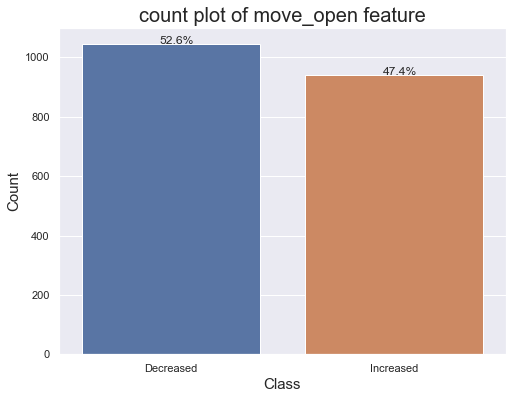

In [15]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set(style="darkgrid")
ax = sns.countplot(x="move_open", data=raw_data_djia_copy[1:])
ax.set_title('count plot of move_open feature', {'fontsize': 20})
ax.set_xlabel('Class', {'fontsize': 15})
ax.set_ylabel('Count', {'fontsize': 15})

#counting the number of each level in move_open feature
counts = raw_data_djia_copy.move_open[1:].value_counts()
without_hue(ax, counts)

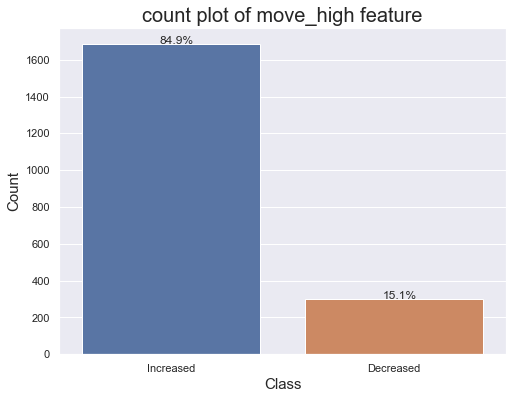

In [16]:
sns.set(style="darkgrid")
ax = sns.countplot(x="move_high", data=raw_data_djia_copy[1:])
ax.set_title('count plot of move_high feature', {'fontsize': 20})
ax.set_xlabel('Class', {'fontsize': 15})
ax.set_ylabel('Count', {'fontsize': 15})

#counting the number of each level in move_open feature
counts = raw_data_djia_copy.move_high[1:].value_counts()
without_hue(ax, counts)

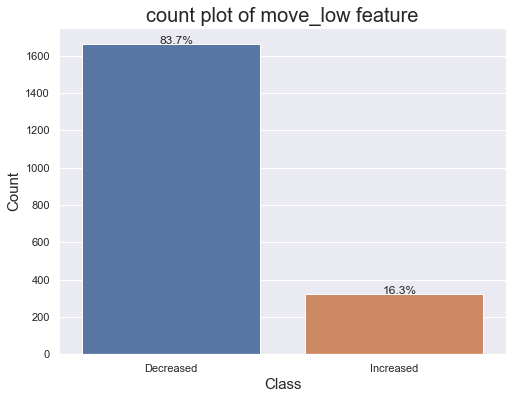

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x="move_low", data=raw_data_djia_copy[1:])
ax.set_title('count plot of move_low feature', {'fontsize': 20})
ax.set_xlabel('Class', {'fontsize': 15})
ax.set_ylabel('Count', {'fontsize': 15})

#counting the number of each level in move_open feature
counts = raw_data_djia_copy.move_low[1:].value_counts()
without_hue(ax, counts)

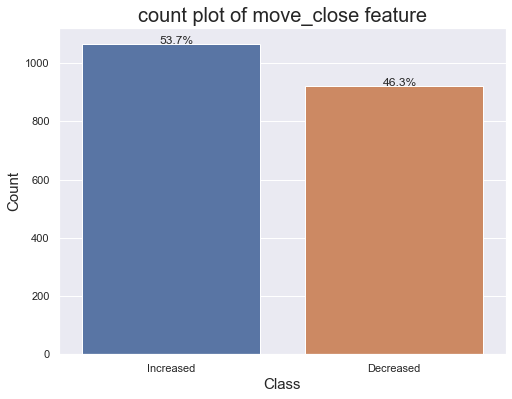

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="move_close", data=raw_data_djia_copy[1:])
ax.set_title('count plot of move_close feature', {'fontsize': 20})
ax.set_xlabel('Class', {'fontsize': 15})
ax.set_ylabel('Count', {'fontsize': 15})

#counting the number of each level in move_open feature
counts = raw_data_djia_copy.move_close[1:].value_counts()
without_hue(ax, counts)

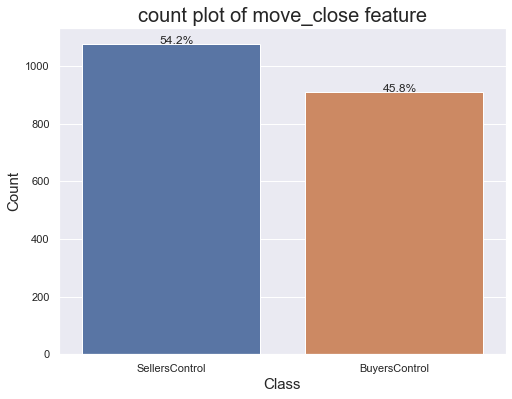

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="move_close_open", data=raw_data_djia_copy[1:])
ax.set_title('count plot of move_close feature', {'fontsize': 20})
ax.set_xlabel('Class', {'fontsize': 15})
ax.set_ylabel('Count', {'fontsize': 15})

#counting the number of each level in move_open feature
counts = raw_data_djia_copy.move_close[1:].value_counts()
without_hue(ax, counts)

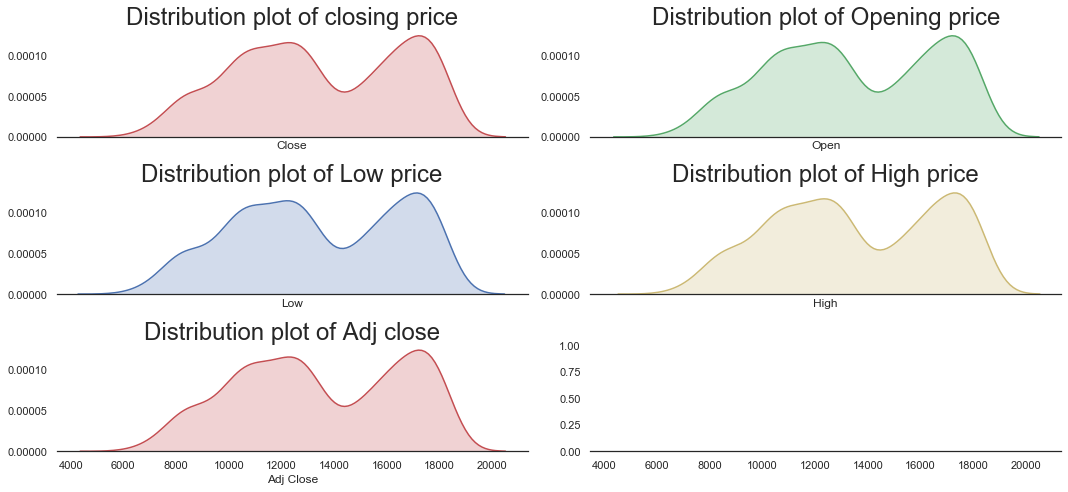

In [20]:
#https://seaborn.pydata.org/examples/distplot_options.html
sns.set(style="white", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 7), sharex=True)

sns.despine(left=True)

sns.distplot(raw_data_djia['Close'], hist=False, color="r",\
             kde_kws={"shade": True}, ax=axes[0, 0]).set_title("Distribution plot of closing price", size = 24)

sns.distplot(raw_data_djia['Open'], hist=False, color = "g", \
             kde_kws={"shade": True}, ax=axes[0, 1]).set_title("Distribution plot of Opening price", size = 24)

sns.distplot(raw_data_djia['Low'], hist=False, color="b", \
             kde_kws={"shade": True}, ax=axes[1, 0]).set_title("Distribution plot of Low price", size = 24)

sns.distplot(raw_data_djia['High'], hist=False, color="y", \
             kde_kws={"shade": True}, ax=axes[1, 1]).set_title("Distribution plot of High price", size = 24)

sns.distplot(raw_data_djia['Adj Close'], hist=False, color="r", \
             kde_kws={"shade": True}, ax=axes[2, 0]).set_title("Distribution plot of Adj close", size = 24)

plt.tight_layout()

# <font color = 'blue'>5. Exploratory Analysis on raw data </font>

## <font color = 'blue'> 5.1 Exploring the time-series plot on each variable </font>  

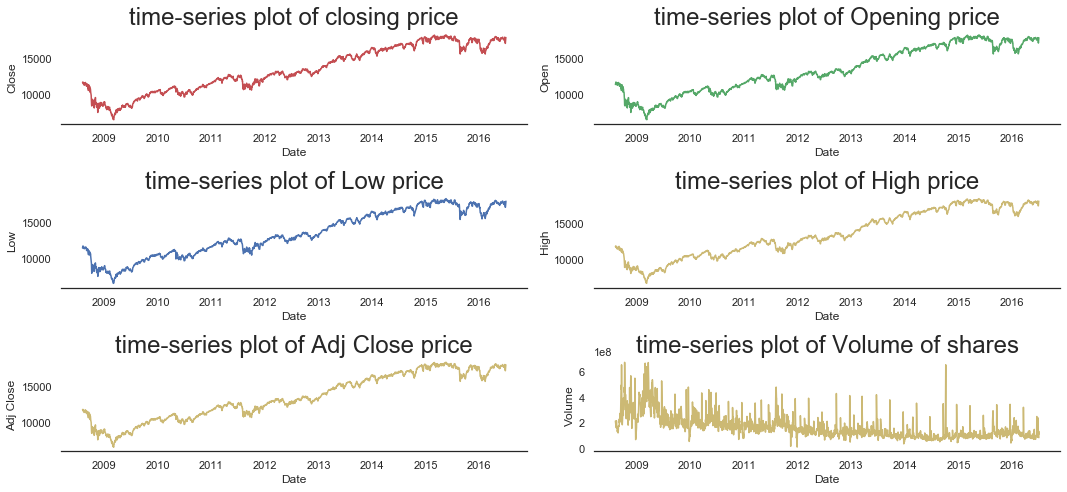

In [21]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 7))
sns.despine(left=True)

sns.lineplot(raw_data_djia_copy.index, raw_data_djia_copy['Close'], color="r", \
             ax=axes[0, 0]).set_title("time-series plot of closing price", size = 24)

sns.lineplot(raw_data_djia_copy.index, raw_data_djia_copy['Open'], color = "g", \
             ax=axes[0, 1]).set_title("time-series plot of Opening price", size = 24)

sns.lineplot(raw_data_djia_copy.index, raw_data_djia_copy['Low'], color="b", \
             ax=axes[1, 0]).set_title("time-series plot of Low price", size = 24)

sns.lineplot(raw_data_djia_copy.index, raw_data_djia_copy['High'], color="y", \
             ax=axes[1, 1]).set_title("time-series plot of High price", size = 24)

sns.lineplot(raw_data_djia_copy.index, raw_data_djia_copy['Adj Close'], color="y", \
             ax=axes[2, 0]).set_title("time-series plot of Adj Close price", size = 24)

sns.lineplot(raw_data_djia_copy.index, raw_data_djia_copy['Volume'], color="y", \
             ax=axes[2, 1]).set_title("time-series plot of Volume of shares", size = 24)

plt.tight_layout()

#### observations

1. The above plots seem that they are non-stationary and most of the time it has positive trends.
2. It seems that the volume of shares doesn't correlated with stock prices and also it seems it is stationary in most of the time.  

## <font color = 'blue'> 5.2 Analysis on class label </font>

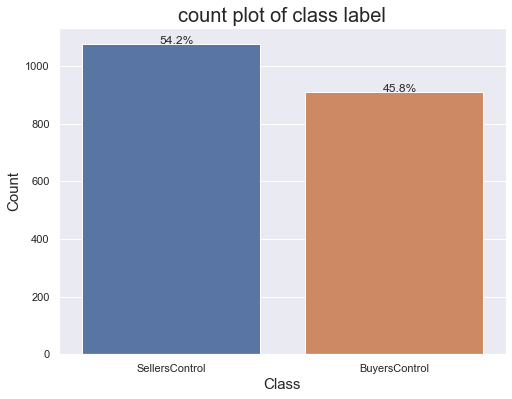

In [22]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set(style="darkgrid")
ax = sns.countplot(x="move_close_open", data=raw_data_djia_copy[1:])
ax.set_title('count plot of class label', {'fontsize': 20})
ax.set_xlabel('Class', {'fontsize': 15})
ax.set_ylabel('Count', {'fontsize': 15})

#counting the number of each level in class label
counts = raw_data_djia_copy.move_close_open[1:].value_counts()
without_hue(ax, counts)

## <font color = 'blue'> 5.3 Exploring the news data </font>

In [23]:
raw_data_news.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

Since, In the news `Top 23, Top 24, Top 25` columns contains na values we need to fill it with an empty string.

In [24]:
#https://www.kite.com/python/answers/how-to-replace-nan-values-with-empty-strings-in-a-pandas-dataframe-in-python
raw_data_news = raw_data_news.fillna("").copy()

In [25]:
raw_data_news[['Top23', 'Top24', 'Top25']].isna().sum()

Top23    0
Top24    0
Top25    0
dtype: int64

# <font color = 'blue'>6. Feature Engineering </font>

## <font color = 'blue'>6.1 On News Data </font>

In [26]:
raw_data_news.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [27]:
#https://www.geeksforgeeks.org/join-two-text-columns-into-a-single-column-in-pandas/
raw_data_news['combined_news'] = raw_data_news[raw_data_news.columns[2:]].apply(lambda x: ' '.join(x), axis = 1)

In [28]:
print(raw_data_news['combined_news'].values[0])

b"Georgia 'downs two Russian warplanes' as countries move to brink of war" b'BREAKING: Musharraf to be impeached.' b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)' b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire' b"Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing" b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side" b"The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]' b'Did the U.S. Prep Georgia for War with Russia?' b'Rice Gives Green 

# <font color = 'blue'> 7. Pre-processing </font>

## <font color = 'blue'>7.1 Text Pre-processing </font>

In [29]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    """
    This function decontract hte engilsh cotracted words (ex: won't to will not) in the phrase
    
    parameters: 
            phrase : an english sentence or a pragraph
    
    returns:
            phrase: returns the same paragraph after decontracted it
    """
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [30]:
#obsering the first paragraph in combined news after decontracted
sent = decontracted(raw_data_news['combined_news'].values[0])
print(sent)
print("="*50)

b"Georgia  wouldowns two Russian warplanes' as countries move to brink of war" b'BREAKING: Musharraf to be impeached.' b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)' b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire' b"Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing" b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO is side" b"The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]' b'Did the U.S. Prep Georgia for War with Russia?' b'Rice Gives G

In [31]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
sent = sent.replace('b\"', ' ')
sent = sent.replace('b\'', ' ')
print(sent)

 Georgia  wouldowns two Russian warplanes' as countries move to brink of war"  BREAKING: Musharraf to be impeached.'  Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)'  Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'  Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing"  150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.'  Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO is side"  The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."  Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]'  Did the U.S. Prep Georgia for War with Russia?'  Rice Gives Green Light 

In [32]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 Georgia wouldowns two Russian warplanes as countries move to brink of war BREAKING Musharraf to be impeached Russia Today Columns of troops roll into South Ossetia footage from fighting YouTube Russian tanks are moving towards the capital of South Ossetia which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity U N official says this is sick a three year old was raped and they do nothing 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets Breaking Georgia invades South Ossetia Russia warned it would intervene on SO is side The enemy combatent trials are nothing but a sham Salim Haman has been sentenced to 5 1 2 years but will be kept longer anyway just because they feel like it Georgian troops retreat from S Osettain capital presumably leaving several hundred people killed VIDEO Did the U S Prep Georgia for War with Russia Rice Gives Green Light for Israel to Attack Iran Says U S has no veto over

In [33]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [34]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_news = []
# tqdm is for printing the status bar
for sentance in tqdm(raw_data_news['combined_news'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('b\"', ' ')
    sent = sent.replace('b\'', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_news.append(sent.lower().strip())

100%|██████████| 1989/1989 [00:03<00:00, 611.22it/s]


In [35]:
# after preprocesing
raw_data_news['clean_news'] = preprocessed_news
preprocessed_news[0]

'georgia wouldowns two russian warplanes countries move brink war breaking musharraf impeached russia today columns troops roll south ossetia footage fighting youtube russian tanks moving towards capital south ossetia reportedly completely destroyed georgian artillery fire afghan children raped impunity u n official says sick three year old raped nothing 150 russian tanks entered south ossetia whilst georgia shoots two russian jets breaking georgia invades south ossetia russia warned would intervene so side the enemy combatent trials nothing sham salim haman sentenced 5 1 2 years kept longer anyway feel like georgian troops retreat s osettain capital presumably leaving several hundred people killed video did u s prep georgia war russia rice gives green light israel attack iran says u s no veto israeli military ops announcing class action lawsuit behalf american public against fbi so russia georgia war nyt top story opening ceremonies olympics what fucking disgrace yet proof decline jou

In [36]:
#sentiment scores for the news data
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_scores = []
sid = SentimentIntensityAnalyzer()
for sentence in tqdm(raw_data_news['clean_news'].values):
    ss = sid.polarity_scores(sentence)
    sentiment_scores.append(ss['compound'])

100%|██████████| 1989/1989 [00:14<00:00, 133.56it/s]


In [37]:
raw_data_news['sentiment_score_news'] = sentiment_scores

# <font color = 'blue'>8. Modelling </font>

In [38]:
#Splitting dataset into train, test with sizes: train:80%, test:20%

TRAIN_SPLIT = int(raw_data_djia_copy.shape[0] * 0.80) #getting index for traind dataset
TEST_SPLIT = int(raw_data_djia_copy.shape[0] * 0.20)  #getting index for validation dataset

## <font color = 'blue'>8.1 Regression Modelling </font>

In [39]:
#features to be used
features_considered = ['move_open', 'move_high', 'move_low', 'move_close', 'move_close_open']
features = raw_data_djia_copy[features_considered][1:]  
#features.index = raw_data_djia['Date']
features.head()

,move_open,move_high,move_low,move_close,move_close_open
Date,,,,,
2008-08-11,Decreased,Increased,Decreased,Increased,SellersControl
2008-08-12,Decreased,Increased,Decreased,Decreased,BuyersControl
2008-08-13,Decreased,Decreased,Decreased,Decreased,BuyersControl
2008-08-14,Decreased,Increased,Decreased,Increased,SellersControl
2008-08-15,Decreased,Increased,Decreased,Increased,SellersControl


In [40]:
#converting into numerical for the categorical fearures
features.move_close = features.move_close.replace({"Increased": 1, "Decreased": 0})
features.move_open = features.move_open.replace({"Increased": 1, "Decreased": 0})
features.move_high = features.move_high.replace({"Increased": 1, "Decreased": 0})
features.move_low = features.move_low.replace({"Increased": 1, "Decreased": 0})
features.move_close_open = features.move_close_open.replace({"SellersControl": 1, "BuyersControl": 0})

In [41]:
#since the dates are sorted in decreasing order we sort the data index such that it will be in increasing order
features_copy = features.sort_index().copy()

In [42]:
features_copy.head(10)

,move_open,move_high,move_low,move_close,move_close_open
Date,,,,,
2008-08-11,0,1,0,1,1
2008-08-12,0,1,0,0,0
2008-08-13,0,0,0,0,0
2008-08-14,0,1,0,1,1
2008-08-15,0,1,0,1,1
2008-08-18,0,1,0,0,0
2008-08-19,0,0,0,0,0
2008-08-20,0,1,0,1,1
2008-08-21,0,1,0,1,1


In [43]:
dataset = features_copy.values

In [44]:
def regression_data(dataset, target, start_index, end_index, train_flag = False):

    """
    This function purpose is to returing the dataset and the labels
    
    parameters:
        dataset(nd-array): It contains the daily stock data
        target(1d-array): It contains the daily closing prices
        start_index(int): It contain the starting point of the dataset to starrt splitting
        end_index(int or None): It contains the ending point os the dataset to end splitting
        train_flag(boolean): It contains boolean value which represents whether the data is to split for train or validation dataset
    
    returns:
        data(array): final dataset read for training or validating
        labels(array): array contains the labels for trianing dataset
    
    """
    
    if train_flag:
        data = dataset[start_index:end_index, :]
        labels = target[start_index+1:end_index+1]
    
    if end_index is None:
        end_index = len(dataset)
        data = dataset[start_index:end_index-1, :]
        labels = target[start_index+1:end_index]

    return np.array(data), np.array(labels)

In [45]:
x_train_single, y_train_single = regression_data(dataset[:, :], dataset[:, -1], 0,
                                                   TRAIN_SPLIT, train_flag = True)

x_test_single, y_test_single = regression_data(dataset[:, :], dataset[:, -1], TRAIN_SPLIT, 
                                                 None, train_flag = False)

print("train data shape:", x_train_single.shape)
print("train label shape:", y_train_single.shape)
print("test data shape:", x_test_single.shape)
print("test label shape:", y_test_single.shape)

train data shape: (1591, 5)
train label shape: (1591,)
test data shape: (396, 5)
test label shape: (396,)


In [46]:
#creating training dataframe
x_train_single_df = pd.DataFrame(x_train_single)
x_train_single_df.columns = ['move_open', 'move_high', 'move_low', 'move_close', 'x_move_close_open']
y_train_single_df = pd.DataFrame(y_train_single)
y_train_single_df.columns = ['y_move_close_open']
x_train_single_df.index = features_copy.index[0:TRAIN_SPLIT]
y_train_single_df.index = features_copy.index[1:TRAIN_SPLIT+1]

In [47]:
x_train_single_df.head()

,move_open,move_high,move_low,move_close,x_move_close_open
Date,,,,,
2008-08-11,0,1,0,1,1
2008-08-12,0,1,0,0,0
2008-08-13,0,0,0,0,0
2008-08-14,0,1,0,1,1
2008-08-15,0,1,0,1,1


In [48]:
y_train_single_df.head()

,y_move_close_open
Date,
2008-08-12,0
2008-08-13,0
2008-08-14,1
2008-08-15,1
2008-08-18,0


In [49]:
#creating test dataframe
x_test_single_df = pd.DataFrame(x_test_single)
x_test_single_df.columns = ['move_open', 'move_high', 'move_low', 'move_close', 'x_movve_close_open']
y_test_single_df = pd.DataFrame(y_test_single)
y_test_single_df.columns = ['y_move_close_open']
x_test_single_df.index = features_copy.index[TRAIN_SPLIT:len(features_copy)-1]
y_test_single_df.index = features_copy.index[TRAIN_SPLIT+1: len(features_copy)]

In [50]:
x_test_single_df.head()

,move_open,move_high,move_low,move_close,x_movve_close_open
Date,,,,,
2014-12-04,0,1,0,0,0
2014-12-05,1,1,1,1,1
2014-12-08,0,1,0,0,0
2014-12-09,0,0,0,0,0
2014-12-10,0,0,0,0,0


In [51]:
y_test_single_df.head()

,y_move_close_open
Date,
2014-12-05,1
2014-12-08,0
2014-12-09,0
2014-12-10,0
2014-12-11,1


In [52]:
#splitting train and test datasets
x_train_news = raw_data_news['clean_news'].values[1:TRAIN_SPLIT+1]
x_test_news = raw_data_news['clean_news'].values[TRAIN_SPLIT+1: -1]

In [53]:
train_news_positive = x_train_news[y_train_single_df.y_move_close_open == 1]
train_news_positive_combined = ""
for news in train_news_positive:
    train_news_positive_combined = train_news_positive_combined + " " + news

In [54]:
train_news_negative = x_train_news[y_train_single_df.y_move_close_open == 0]
train_news_negative_combined = ""
for news in train_news_negative:
    train_news_negative_combined = train_news_negative_combined + " " + news

In [55]:
stopwords = set(STOPWORDS) 

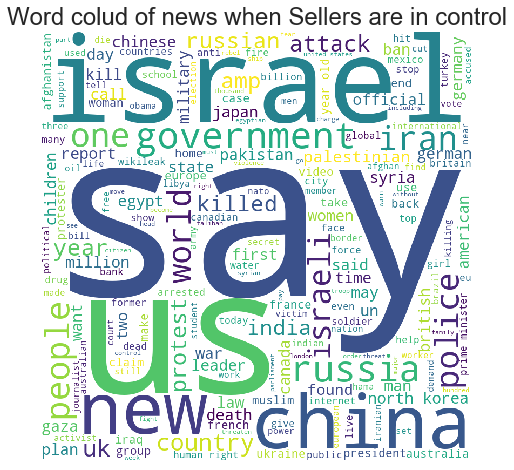

In [56]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(train_news_positive_combined) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word colud of news when Sellers are in control", size = 24)
  
plt.show() 

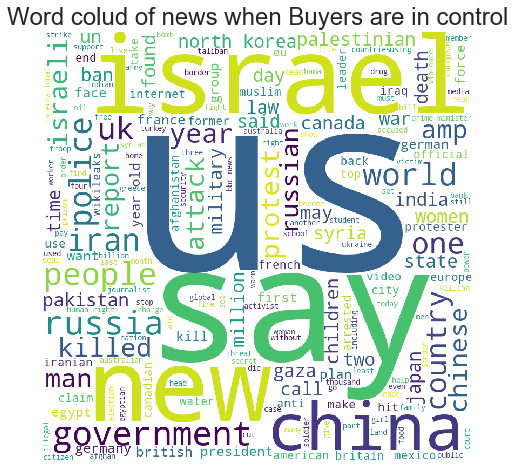

In [57]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(train_news_negative_combined) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word colud of news when Buyers are in control", size = 24)
  
plt.show()

## <font color = 'blue'> 8.2 Features generating from the text data </font>

In [58]:
x_train_sentiment_score_news = raw_data_news['sentiment_score_news'].values[1:TRAIN_SPLIT+1]
x_test_sentiment_score_news = raw_data_news['sentiment_score_news'].values[TRAIN_SPLIT+1:-1]

In [59]:
#https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
embeddings_dict = {}
with open(data_path + "glove/glove.6B.50d.txt", 'r', encoding = "utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [60]:
glove_words =  set(embeddings_dict.keys())

### <font color = 'blue'> 8.2.1 Average Word2Vec feature generations </font>

In [61]:
# average Word2Vec
# compute average word2vec for each review.
x_train_avg_w2v_news = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train_news[:]): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += embeddings_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_avg_w2v_news.append(vector)

print(len(x_train_avg_w2v_news))
print(len(x_train_avg_w2v_news[0]))

100%|██████████| 1591/1591 [00:01<00:00, 948.25it/s]

1591
50


In [62]:
# average Word2Vec
# compute average word2vec for each review.
x_test_avg_w2v_news = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test_news[:]): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += embeddings_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_avg_w2v_news.append(vector)

print(len(x_test_avg_w2v_news))
print(len(x_test_avg_w2v_news[0]))

100%|██████████| 396/396 [00:00<00:00, 815.32it/s]

396
50


### <font color = 'blue'> 8.2.2 TFIDF_W2V feature generations </font>

In [63]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train_news)

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_))) #dictionary of words and corresponding idf values
tfidf_words = set(tfidf_model.get_feature_names())

In [64]:
x_train_tfidf_w2v_news = []; 
for sentence in tqdm(x_train_news):
    vector = np.zeros(50)
    tf_idf_weight =0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = embeddings_dict[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_tfidf_w2v_news.append(vector)

print(len(x_train_tfidf_w2v_news))
print(len(x_train_tfidf_w2v_news[0]))

100%|██████████| 1591/1591 [00:18<00:00, 87.39it/s]

1591
50


In [65]:
x_test_tfidf_w2v_news = []; 
for sentence in tqdm(x_test_news):
    vector = np.zeros(50)
    tf_idf_weight =0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = embeddings_dict[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_tfidf_w2v_news.append(vector)

print(len(x_test_tfidf_w2v_news))
print(len(x_test_tfidf_w2v_news[0]))

100%|██████████| 396/396 [00:04<00:00, 85.18it/s]

396
50


In [66]:
x_train_avg_w2v_news = np.asarray(x_train_avg_w2v_news)

In [67]:
x_tr_stock_sent = np.concatenate((x_train_single, np.expand_dims(x_train_sentiment_score_news, axis = 1)), axis = 1)
x_te_stock_sent = np.concatenate((x_test_single, np.expand_dims(x_test_sentiment_score_news, axis = 1)), axis = 1)

In [68]:
x_tr_avg_w2v = np.concatenate((x_train_single, x_train_avg_w2v_news, \
                               np.expand_dims(x_train_sentiment_score_news, axis = 1)), axis = 1)
x_te_avg_w2v = np.concatenate((x_test_single, x_test_avg_w2v_news, \
                               np.expand_dims(x_test_sentiment_score_news, axis = 1)), axis = 1)

In [69]:
x_tr_tfidf_w2v = np.concatenate((x_train_single, x_train_tfidf_w2v_news, \
                               np.expand_dims(x_train_sentiment_score_news, axis = 1)), axis = 1)
x_te_tfidf_w2v = np.concatenate((x_test_single, x_test_tfidf_w2v_news, \
                               np.expand_dims(x_test_sentiment_score_news, axis = 1)), axis = 1)

## <font color = 'blue'> 8.3 modelling </font>

In [65]:
#https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

class MlModel():
    
    def __init__(self):
        pass
    
    def predict_prob(self, clf, data):
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class

        '''
            This function predicts the probability of the output value the with given model

            params:
                clf (model object) : machine learning model object
                data (dataframe)   : dataframe which needs to be predicted

            returns:
                y_data_pred : containes the predicted probability of positive class
        '''

        y_data_pred = []
        y_data_pred.extend(clf.predict_proba(data)[:,1])

        return y_data_pred

    # we will pick a threshold that will give the least fpr
    def predict(self, proba, threshold, fpr, tpr):
        '''
            This function returns the predicted value for the given input by selecting best threshold value

            params:
                proba(list)     : It contains the postive predicted probability of each data point
                threshold(list) : It contains the vaious thrhsolds from 0 to 1.
                fpr(list)       : fpr for each threshold
                tpr(list)       : tpr for each threshold

            returns:
                predictions(list) : predicted binary value 
         '''
        print(f"threshold length: {len(threshold)}")
        print(f"fpr length: {len(fpr)}")
        print(f"tpr length: {len(tpr)}")
        t = threshold[np.argmax(tpr*(1-fpr))] # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
        print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
         
        predictions = []
        for i in proba:
            if i>=t:
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions
    
    def plot_confusion_matrix(self, matrix, train_index):
    
        '''
           plots confusion matrix
           params:
               matrix(numpy array) : matrix contains tn, fp, fn, tp
               train_index : index the matrix whether it contains for train or test
           returns:
                nothing returns rather just dispaly the heat map of confusion matrix
        '''
        ax = sns.heatmap(matrix, annot=True, fmt="d")
        if train_index:
            ax.set_title("Train confusion matrix")
        else:
            ax.set_title("test confusion matrix")
        ax.set(xlabel = 'predicted output', ylabel = 'actual output')
    
    def knn_model(self, x_train, y_train):
    
        '''
            This function models with knn with cross validation
            params: 
                x_train(numpy ndarray) : dataset contains feature values
                y_train(numpy 1darray) : dataset contains the output label
            return:
                best_k : returns bet k value after modelling knn with different k
        '''
        train_auc = []  #will contain auc of train dataset after each hyper parameter 'k'
        cv_auc = []     #will contain auc of validation dataset after each hyer parameter 'k'

        k = np.arange(1, 15, step = 2)
        
        #create new a knn model
        knn = KNeighborsClassifier()
        
        #create a dictionary of all values we want to test for n_neighbors
        param_grid = {'n_neighbors': k}
        
        #use gridsearch to test all values for n_neighbors
        knn_gscv = GridSearchCV(knn, param_grid, cv=3)
        
        #fit model to data
        knn_gscv.fit(x_train, y_train)
        
        best_k = knn_gscv.best_params_.get('n_neighbors')
        
        return best_k
    
    def roc_curve_for_best_knn(self, x_train, y_train, x_test, y_test, best_k):
        
        '''
            This function models with knn with best k
            params: 
                x_train(numpy ndarray) : dataset contains train feature values
                y_train(numpy 1darray) : dataset contains the train output label
                x_test(numpy ndarray)  : dataset contains test feature values
                y_test(numpy 1darray) : dataset contains the test output label
            return:
                nothing returns but gives the metrics of the test data nad train data after applying the model
        '''
        
        # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
        neigh = KNeighborsClassifier(n_neighbors=best_k)
        neigh.fit(x_train, y_train)
        y_train_pred = self.predict_prob(neigh, x_train)    
        y_test_pred = self.predict_prob(neigh, x_test)

        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

        plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
        plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
        plt.legend()
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"ROC curve having best k = {best_k}")
        
        plt.grid()
        plt.show()
        
        train_matrix = confusion_matrix(y_train, self.predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
        self.plot_confusion_matrix(train_matrix, train_index = True)
        plt.show()
        
        y_train_predict = self.predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
        print('accuracy on train data:', accuracy_score(y_train, y_train_predict))
        print('precision on train data:', precision_score(y_train, y_train_predict))
        print('recall on train data:', recall_score(y_train, y_train_predict))
        print('f1_score on train data:', f1_score(y_train, y_train_predict))
        print("=="*50)
        
        test_matrix = confusion_matrix(y_test, self.predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))
        self.plot_confusion_matrix(test_matrix, train_index = False)
        plt.show()
        
        y_test_predict = self.predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)
        print('accuracy on test data:', accuracy_score(y_test, y_test_predict))
        print('precision on test data:', precision_score(y_test, y_test_predict))
        print('recall on test data:', recall_score(y_test, y_test_predict))
        print('f1_score on test data:', f1_score(y_test, y_test_predict))
        
        
    
    def svm_model(self, x_train, y_train):
        train_auc = []  #will contain auc of train dataset after each hyper parameter 'k'
        cv_auc = []     #will contain auc of validation dataset after each hyer parameter 'k'
        
        
        # defining parameter range 
        param_grid = {'C': [0.1, 1, 10],  
                      'gamma': [1, 0.1], 
                      'kernel': ['rbf']}  
        
        svc = SVC()
        svm_gscv = GridSearchCV(svc, param_grid, refit = True, cv = 3, verbose = 3) 

        # fitting the model for grid search 
        _ = svm_gscv.fit(x_train, y_train)
        
        best_c = svm_gscv.best_params_.get('C')
        best_gamma = svm_gscv.best_params_.get('gamma')
        
        return best_c, best_gamma
    
    def roc_curve_for_best_svm(self, x_train, y_train, x_test, y_test, best_c, best_gamma):
        
        svc = SVC(gamma = best_gamma, C = best_c, probability = True)
        
        svc.fit(x_train, y_train)
        y_train_pred = self.predict_prob(svc, x_train)    
        y_test_pred = self.predict_prob(svc, x_test)

        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

        plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
        plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
        plt.legend()
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"ROC curve having best_c = {best_c} and best_gamma = {best_gamma}")
        plt.grid()
        plt.show()
        
        train_matrix = confusion_matrix(y_train, self.predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
        self.plot_confusion_matrix(train_matrix, train_index = True)
        plt.show()
        
        y_train_predict = self.predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
        print('accuracy on train data:', accuracy_score(y_train, y_train_predict))
        print('precision on train data:', precision_score(y_train, y_train_predict))
        print('recall on train data:', recall_score(y_train, y_train_predict))
        print('f1_score on train data:', f1_score(y_train, y_train_predict))
        print("=="*50)
        
        test_matrix = confusion_matrix(y_test, self.predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
        self.plot_confusion_matrix(test_matrix, train_index = False)
        plt.show()
        
        y_test_predict = self.predict(y_test_pred, te_thresholds, test_fpr, test_tpr)
        print('accuracy on test data:', accuracy_score(y_test, y_test_predict))
        print('precision on test data:', precision_score(y_test, y_test_predict))
        print('recall on test data:', recall_score(y_test, y_test_predict))
        print('f1_score on test data:', f1_score(y_test, y_test_predict))
        

## <font color = 'blue'> The first way of modelling the first dataset </font>

### <font color = 'blue'> 8.3.1 Applying KNN only using stock data </font>

In [66]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_single_df)

x_train_norm = scaler.transform(x_train_single_df)
x_test_norm = scaler.transform(x_test_single_df)

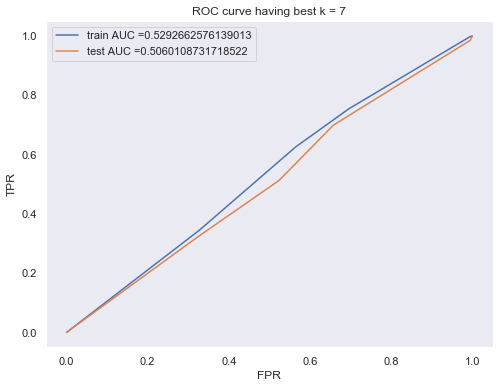

threshold length: 6
fpr length: 6
tpr length: 6
the maximum value of tpr*(1-fpr) 0.2722721572906795 for threshold 0.714


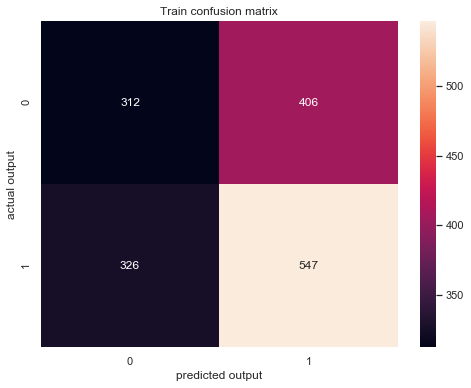

threshold length: 6
fpr length: 6
tpr length: 6
the maximum value of tpr*(1-fpr) 0.2722721572906795 for threshold 0.714
accuracy on train data: 0.5399120050282841
precision on train data: 0.5739769150052466
recall on train data: 0.6265750286368843
f1_score on train data: 0.5991237677984665
threshold length: 6
fpr length: 6
tpr length: 6
the maximum value of tpr*(1-fpr) 0.24421246075703823 for threshold 0.714


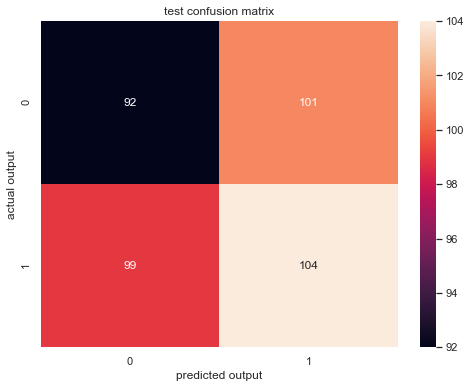

threshold length: 6
fpr length: 6
tpr length: 6
the maximum value of tpr*(1-fpr) 0.24421246075703823 for threshold 0.714
accuracy on test data: 0.494949494949495
precision on test data: 0.5073170731707317
recall on test data: 0.5123152709359606
f1_score on test data: 0.5098039215686275


In [67]:
model1 = MlModel()
best_k = model1.knn_model(x_train_norm, y_train_single_df)
model1.roc_curve_for_best_knn(x_train_norm, y_train_single_df, x_test_norm, y_test_single_df, best_k)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.542, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.551, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.548, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.2s finished


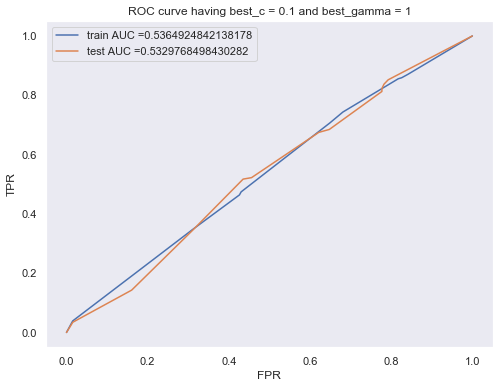

threshold length: 13
fpr length: 13
tpr length: 13
the maximum value of tpr*(1-fpr) 0.27013755276684953 for threshold 0.549


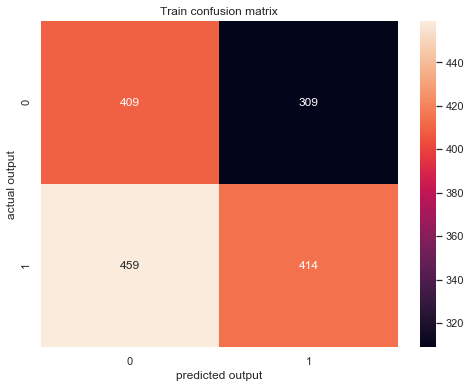

threshold length: 13
fpr length: 13
tpr length: 13
the maximum value of tpr*(1-fpr) 0.27013755276684953 for threshold 0.549
accuracy on train data: 0.5172847265870522
precision on train data: 0.5726141078838174
recall on train data: 0.4742268041237113
f1_score on train data: 0.518796992481203
threshold length: 13
fpr length: 13
tpr length: 13
the maximum value of tpr*(1-fpr) 0.292120778988744 for threshold 0.549


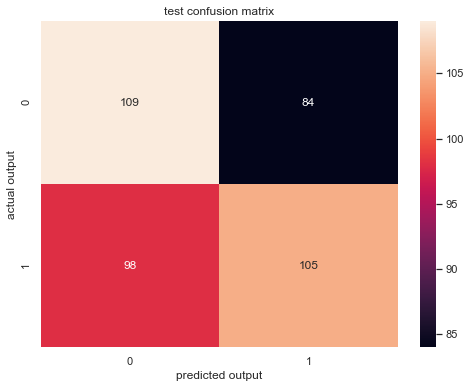

threshold length: 13
fpr length: 13
tpr length: 13
the maximum value of tpr*(1-fpr) 0.292120778988744 for threshold 0.549
accuracy on test data: 0.5404040404040404
precision on test data: 0.5555555555555556
recall on test data: 0.5172413793103449
f1_score on test data: 0.5357142857142857


In [68]:
best_c, best_gamma = model1.svm_model(x_train_norm, y_train_single_df)
model1.roc_curve_for_best_svm(x_train_norm, y_train_single_df, x_test_norm, y_test_single_df, best_c, best_gamma)

### <font color = 'blue'> 8.3.2 Applying knn using stock data and the news sentiment </font>

In [69]:
scaler = MinMaxScaler()
scaler.fit(x_tr_stock_sent)

x_tr_stock_norm = scaler.transform(x_tr_stock_sent)
x_te_stock_norm = scaler.transform(x_te_stock_sent)

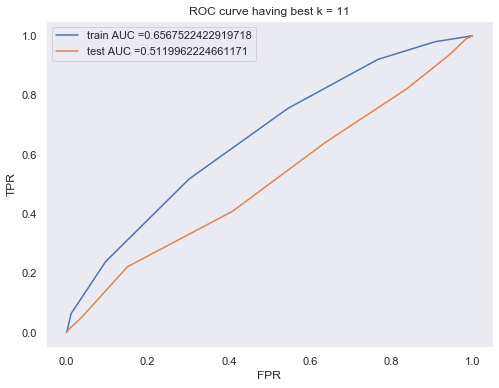

threshold length: 12
fpr length: 12
tpr length: 12
the maximum value of tpr*(1-fpr) 0.3612746364950368 for threshold 0.636


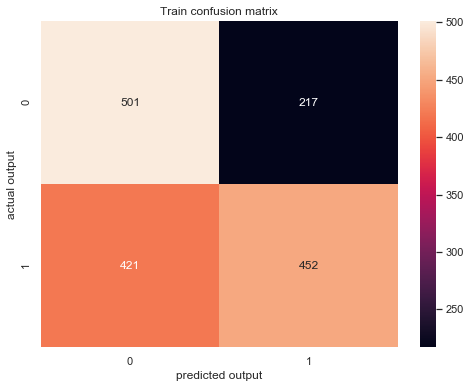

threshold length: 12
fpr length: 12
tpr length: 12
the maximum value of tpr*(1-fpr) 0.3612746364950368 for threshold 0.636
accuracy on train data: 0.5989943431803897
precision on train data: 0.6756352765321375
recall on train data: 0.5177548682703322
f1_score on train data: 0.5862516212710766
threshold length: 12
fpr length: 10
tpr length: 10
the maximum value of tpr*(1-fpr) 0.241506929732765 for threshold 0.727


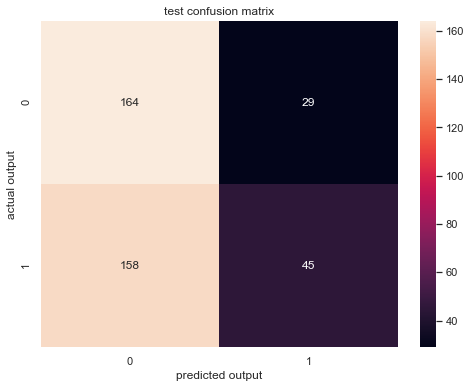

threshold length: 12
fpr length: 10
tpr length: 10
the maximum value of tpr*(1-fpr) 0.241506929732765 for threshold 0.727
accuracy on test data: 0.5277777777777778
precision on test data: 0.6081081081081081
recall on test data: 0.22167487684729065
f1_score on test data: 0.3249097472924188


In [70]:
model2 = MlModel()
best_k = model2.knn_model(x_tr_stock_norm, y_train_single_df)
model2.roc_curve_for_best_knn(x_tr_stock_norm, y_train_single_df, x_te_stock_norm, y_test_single_df, best_k)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.542, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.543, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.3s finished


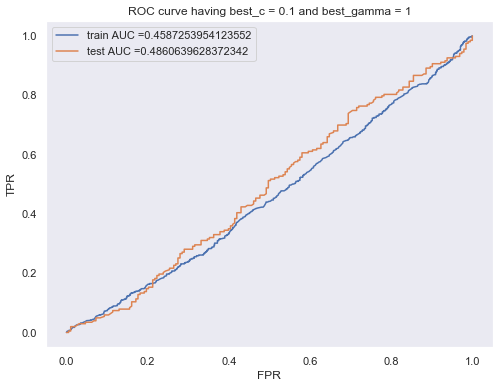

threshold length: 672
fpr length: 672
tpr length: 672
the maximum value of tpr*(1-fpr) 0.2249854023681666 for threshold 0.546


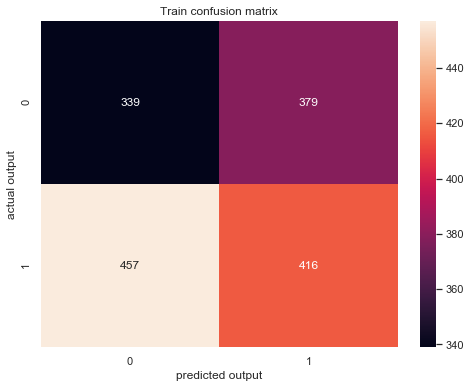

threshold length: 672
fpr length: 672
tpr length: 672
the maximum value of tpr*(1-fpr) 0.2249854023681666 for threshold 0.546
accuracy on train data: 0.47454431175361406
precision on train data: 0.5232704402515723
recall on train data: 0.4765177548682703
f1_score on train data: 0.49880095923261386
threshold length: 224
fpr length: 224
tpr length: 224
the maximum value of tpr*(1-fpr) 0.25748487710252943 for threshold 0.546


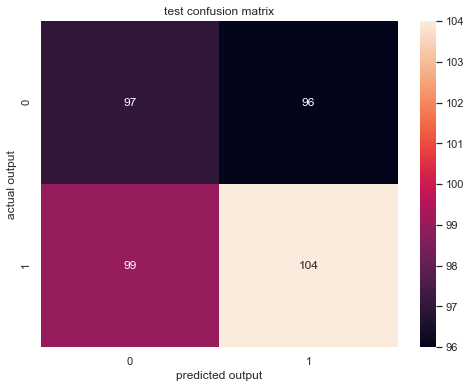

threshold length: 224
fpr length: 224
tpr length: 224
the maximum value of tpr*(1-fpr) 0.25748487710252943 for threshold 0.546
accuracy on test data: 0.5075757575757576
precision on test data: 0.52
recall on test data: 0.5123152709359606
f1_score on test data: 0.5161290322580646


In [71]:
best_c, best_gamma = model2.svm_model(x_tr_stock_norm, y_train_single_df)
model2.roc_curve_for_best_svm(x_tr_stock_norm, y_train_single_df, x_te_stock_norm, y_test_single_df, best_c, best_gamma)

### <font color = 'blue'> Applying knn by using stock data and news data </font>

In [72]:
scaler = MinMaxScaler()
scaler.fit(x_tr_avg_w2v)

x_tr_avgW2v_norm = scaler.transform(x_tr_avg_w2v)
x_te_avgW2v_norm = scaler.transform(x_te_avg_w2v)

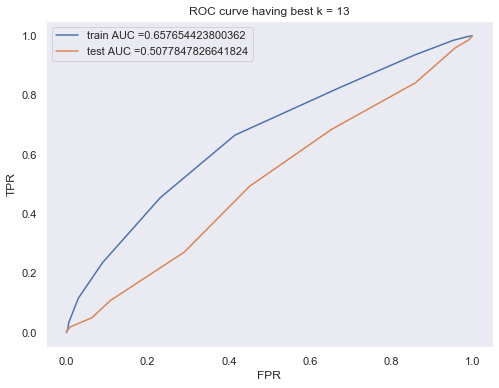

threshold length: 14
fpr length: 14
tpr length: 14
the maximum value of tpr*(1-fpr) 0.38930208961510115 for threshold 0.538


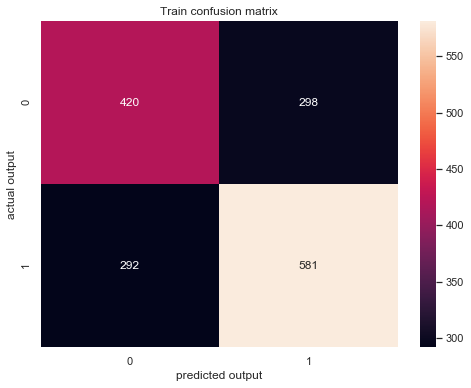

threshold length: 14
fpr length: 14
tpr length: 14
the maximum value of tpr*(1-fpr) 0.38930208961510115 for threshold 0.538
accuracy on train data: 0.6291640477686989
precision on train data: 0.6609783845278726
recall on train data: 0.6655211912943871
f1_score on train data: 0.6632420091324202
threshold length: 14
fpr length: 12
tpr length: 12
the maximum value of tpr*(1-fpr) 0.2705531024273207 for threshold 0.615


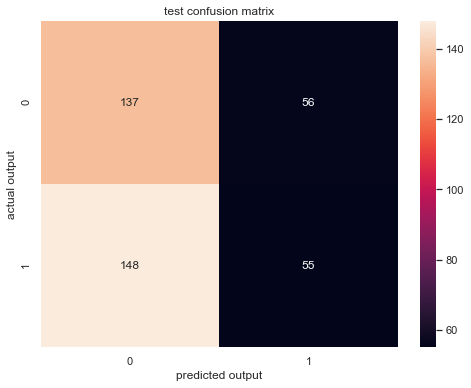

threshold length: 14
fpr length: 12
tpr length: 12
the maximum value of tpr*(1-fpr) 0.2705531024273207 for threshold 0.615
accuracy on test data: 0.48484848484848486
precision on test data: 0.4954954954954955
recall on test data: 0.270935960591133
f1_score on test data: 0.35031847133757954


In [73]:
model3 = MlModel()
best_k = model3.knn_model(x_tr_avg_w2v, y_train_single_df)
model3.roc_curve_for_best_knn(x_tr_avg_w2v, y_train_single_df, x_te_avg_w2v, y_test_single_df, best_k)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.557, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.511, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.543, total=   0.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.5s finished


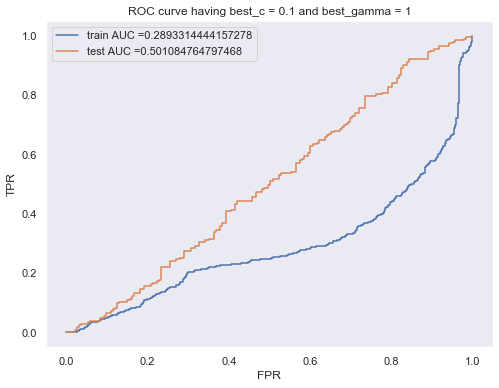

threshold length: 638
fpr length: 638
tpr length: 638
the maximum value of tpr*(1-fpr) 0.14334874460366234 for threshold 0.548


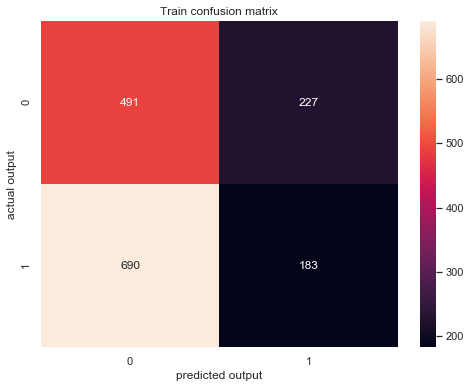

threshold length: 638
fpr length: 638
tpr length: 638
the maximum value of tpr*(1-fpr) 0.14334874460366234 for threshold 0.548
accuracy on train data: 0.4236329352608422
precision on train data: 0.44634146341463415
recall on train data: 0.20962199312714777
f1_score on train data: 0.2852689010132502
threshold length: 194
fpr length: 194
tpr length: 194
the maximum value of tpr*(1-fpr) 0.2572806860818296 for threshold 0.545


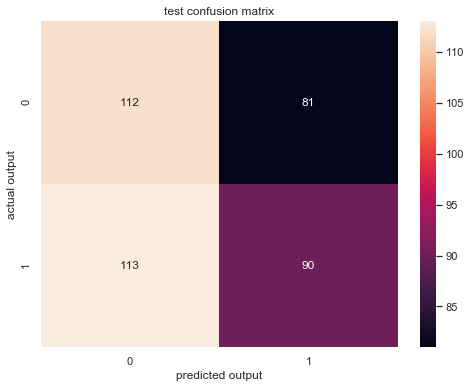

threshold length: 194
fpr length: 194
tpr length: 194
the maximum value of tpr*(1-fpr) 0.2572806860818296 for threshold 0.545
accuracy on test data: 0.51010101010101
precision on test data: 0.5263157894736842
recall on test data: 0.4433497536945813
f1_score on test data: 0.4812834224598931


In [74]:
best_c, best_gamma = model3.svm_model(x_tr_avg_w2v, y_train_single_df)
model3.roc_curve_for_best_svm(x_tr_avg_w2v, y_train_single_df, x_te_avg_w2v, y_test_single_df, best_c, best_gamma)

In [75]:
scaler = MinMaxScaler()
scaler.fit(x_tr_tfidf_w2v)

x_tr_tfidf_norm = scaler.transform(x_tr_tfidf_w2v)
x_te_tfidf_norm = scaler.transform(x_te_tfidf_w2v)

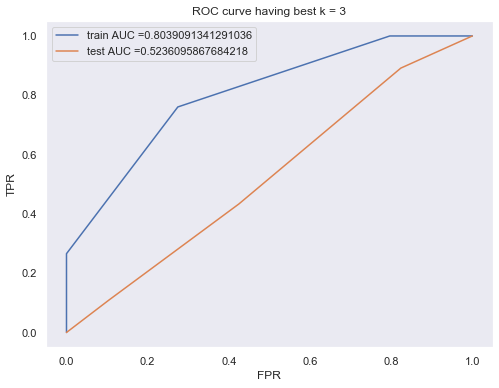

threshold length: 5
fpr length: 5
tpr length: 5
the maximum value of tpr*(1-fpr) 0.5519085406516127 for threshold 0.667


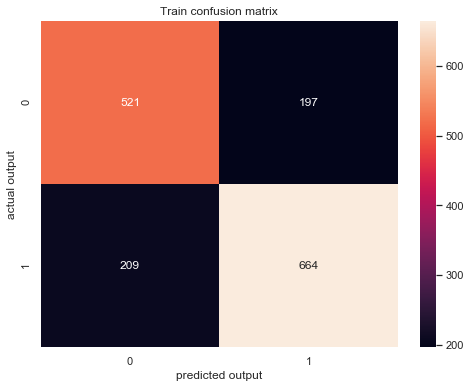

threshold length: 5
fpr length: 5
tpr length: 5
the maximum value of tpr*(1-fpr) 0.5519085406516127 for threshold 0.667
accuracy on train data: 0.7448145820238844
precision on train data: 0.7711962833914053
recall on train data: 0.7605956471935853
f1_score on train data: 0.7658592848904268
threshold length: 5
fpr length: 5
tpr length: 5
the maximum value of tpr*(1-fpr) 0.24931723627453486 for threshold 0.667


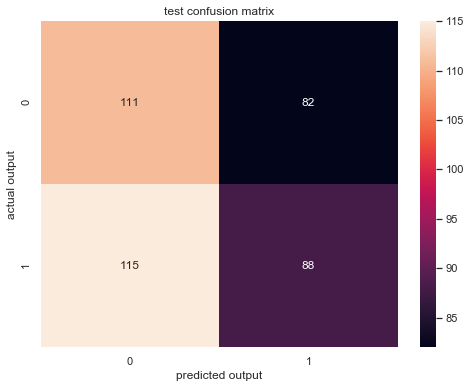

threshold length: 5
fpr length: 5
tpr length: 5
the maximum value of tpr*(1-fpr) 0.24931723627453486 for threshold 0.667
accuracy on test data: 0.5025252525252525
precision on test data: 0.5176470588235295
recall on test data: 0.43349753694581283
f1_score on test data: 0.47184986595174266


In [76]:
model4 = MlModel()
best_k = model4.knn_model(x_tr_tfidf_norm, y_train_single_df)
model4.roc_curve_for_best_knn(x_tr_tfidf_norm, y_train_single_df, x_te_tfidf_norm, y_test_single_df, best_k)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.529, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.508, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.553, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.2s finished


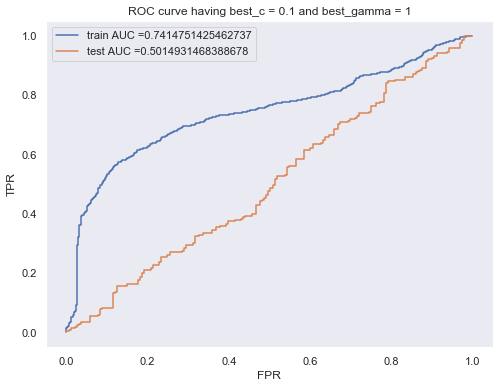

threshold length: 634
fpr length: 634
tpr length: 634
the maximum value of tpr*(1-fpr) 0.5080310905627506 for threshold 0.554


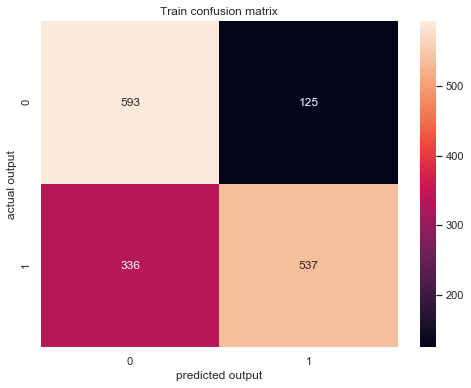

threshold length: 634
fpr length: 634
tpr length: 634
the maximum value of tpr*(1-fpr) 0.5080310905627506 for threshold 0.554
accuracy on train data: 0.71024512884978
precision on train data: 0.8111782477341389
recall on train data: 0.6151202749140894
f1_score on train data: 0.6996742671009771
threshold length: 191
fpr length: 191
tpr length: 191
the maximum value of tpr*(1-fpr) 0.25523877587483096 for threshold 0.551


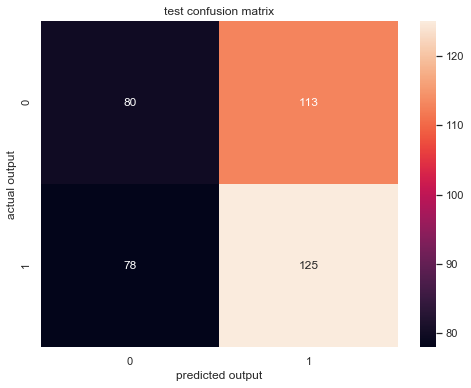

threshold length: 191
fpr length: 191
tpr length: 191
the maximum value of tpr*(1-fpr) 0.25523877587483096 for threshold 0.551
accuracy on test data: 0.5176767676767676
precision on test data: 0.5252100840336135
recall on test data: 0.6157635467980296
f1_score on test data: 0.5668934240362812


In [77]:
best_c, best_gamma = model4.svm_model(x_tr_tfidf_w2v, y_train_single_df)
model4.roc_curve_for_best_svm(x_tr_tfidf_w2v, y_train_single_df, x_te_tfidf_w2v, y_test_single_df, best_c, best_gamma)

### <font color = 'blue'> Observations </font>

In [78]:
x = PrettyTable()

x.field_names = ["Model", "Data used", " text encoded", "train accuracy", "test accuracy"]
x.add_row(["knn", "only stock data", "no text", "0.53", "0.49"])
x.add_row(["svm", "only stock data", "no text", "0.48", "0.46"])
x.add_row(["knn", " stock data and news sentiment", "no text", "0.59", "0.52"])
x.add_row(["svm", " stock data and news sentiment", "no text", "0.47", "0.46"])
x.add_row(["knn", "stock data and news", "avgw2v", "0.62", "0.48"])
x.add_row(["svm", "stock data and news", "avgw2v", "0.42", "0.47"])
x.add_row(["knn", "stock data and news", "tfidf", "0.74", "0.50"])
x.add_row(["svm", "stock data and news", "tfidf", "0.71", "0.49"])

print(x)

+-------+--------------------------------+---------------+----------------+---------------+
| Model |           Data used            |  text encoded | train accuracy | test accuracy |
+-------+--------------------------------+---------------+----------------+---------------+
|  knn  |        only stock data         |    no text    |      0.53      |      0.49     |
|  svm  |        only stock data         |    no text    |      0.48      |      0.46     |
|  knn  |  stock data and news sentiment |    no text    |      0.59      |      0.52     |
|  svm  |  stock data and news sentiment |    no text    |      0.47      |      0.46     |
|  knn  |      stock data and news       |     avgw2v    |      0.62      |      0.48     |
|  svm  |      stock data and news       |     avgw2v    |      0.42      |      0.47     |
|  knn  |      stock data and news       |     tfidf     |      0.74      |      0.50     |
|  svm  |      stock data and news       |     tfidf     |      0.71      |     

## <font color = 'blue'> The second way of modelling the first dataset </font>

In [79]:
# transforming the dataset such that each class label is modelled with every headline of top25 headlines
data_news_top25 = pd.DataFrame()

date_list = list()
news_list = list()
for index in range(1, raw_data_news.shape[0]):
    #data_news_top25['Date'].extend(pd.Series(raw_data_news.iloc[index, 0]))
    for i in range(25):
        date_list.append(raw_data_news.iloc[index, 0])
    news_list.extend(raw_data_news.iloc[index,2:-3].values)
data_news_top25['Date'] = date_list
data_news_top25['news_headlines'] = news_list

In [80]:
data_news_top25.head(5)

,Date,news_headlines
0,2008-08-11,b'Why wont America and Nato help us? If they w...
1,2008-08-11,b'Bush puts foot down on Georgian conflict'
2,2008-08-11,"b""Jewish Georgian minister: Thanks to Israeli ..."
3,2008-08-11,b'Georgian army flees in disarray as Russians ...
4,2008-08-11,"b""Olympic opening ceremony fireworks 'faked'"""


In [81]:
# Combining all the above stundents 
preprocessed_news = []
# tqdm is for printing the status bar
for sentance in tqdm(data_news_top25['news_headlines'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('b\"', ' ')
    sent = sent.replace('b\'', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_news.append(sent.lower().strip())

100%|██████████| 49700/49700 [00:06<00:00, 8270.81it/s]


In [82]:
data_news_top25['clean_news'] = preprocessed_news

In [83]:
sentiment_scores = []
sid = SentimentIntensityAnalyzer()
for sentence in tqdm(data_news_top25['clean_news'].values):
    ss = sid.polarity_scores(sentence)
    sentiment_scores.append(ss['compound'])

100%|██████████| 49700/49700 [00:20<00:00, 2377.72it/s]


In [84]:
data_news_top25['sentiment_scores'] = sentiment_scores

In [85]:
data_news_top25.head()

,Date,news_headlines,clean_news,sentiment_scores
0,2008-08-11,b'Why wont America and Nato help us? If they w...,why wont america nato help us if wont help us ...,-0.6979
1,2008-08-11,b'Bush puts foot down on Georgian conflict',bush puts foot georgian conflict,-0.3182
2,2008-08-11,"b""Jewish Georgian minister: Thanks to Israeli ...",jewish georgian minister thanks israeli traini...,0.4404
3,2008-08-11,b'Georgian army flees in disarray as Russians ...,georgian army flees disarray russians advance ...,-0.1965
4,2008-08-11,"b""Olympic opening ceremony fireworks 'faked'""",olympic opening ceremony fireworks faked,0.0000


In [86]:
#features to be used
features_considered = ['move_open', 'move_high', 'move_low', 'move_close', 'move_close_open']
features = raw_data_djia_copy[features_considered][1:]  
#features.index = raw_data_djia['Date']
features.head()

,move_open,move_high,move_low,move_close,move_close_open
Date,,,,,
2008-08-11,Decreased,Increased,Decreased,Increased,Increased
2008-08-12,Decreased,Increased,Decreased,Decreased,Decreased
2008-08-13,Decreased,Decreased,Decreased,Decreased,Decreased
2008-08-14,Decreased,Increased,Decreased,Increased,Increased
2008-08-15,Decreased,Increased,Decreased,Increased,Increased


In [87]:
#https://stackoverflow.com/questions/49074021/repeat-rows-in-data-frame-n-times
features_copy = features.loc[features.index.repeat(25)]

In [88]:
features_copy.move_close = features_copy.move_close.replace({"Increased": 1, "Decreased": 0})
features_copy.move_open = features_copy.move_open.replace({"Increased": 1, "Decreased": -1, "Same": 0})
features_copy.move_high = features_copy.move_high.replace({"Increased": 1, "Decreased": -1, "Same": 0})
features_copy.move_low = features_copy.move_low.replace({"Increased": 1, "Decreased": -1, "Same": 0})
features_copy.move_close_open = features_copy.move_close_open.replace({"Increased": 1, "Decreased": 0})

In [89]:
features_copy.head()

,move_open,move_high,move_low,move_close,move_close_open
Date,,,,,
2008-08-11,-1,1,-1,1,1
2008-08-11,-1,1,-1,1,1
2008-08-11,-1,1,-1,1,1
2008-08-11,-1,1,-1,1,1
2008-08-11,-1,1,-1,1,1


In [90]:
dataset = features_copy.values

In [91]:
def regression_data(dataset, target, start_index, end_index, train_flag = False):

    """
    This function purpose is to returing the dataset and the labels
    
    parameters:
        dataset(nd-array): It contains the daily stock data
        target(1d-array): It contains the daily closing prices
        start_index(int): It contain the starting point of the dataset to starrt splitting
        end_index(int or None): It contains the ending point os the dataset to end splitting
        train_flag(boolean): It contains boolean value which represents whether the data is to split for train or validation dataset
    
    returns:
        data(array): final dataset read for training or validating
        labels(array): array contains the labels for trianing dataset
    
    """
    
    if train_flag:
        data = dataset[start_index:end_index-25, :]
        labels = target[start_index+25:end_index]
    
    if end_index is None:
        end_index = len(dataset)
        data = dataset[start_index-25:end_index-25, :]
        labels = target[start_index:end_index]

    return np.array(data), np.array(labels)

In [92]:
TRAIN_SPLIT = int(0.8 * len(dataset))

In [93]:
x_train_single, y_train_single = regression_data(dataset[:, :], dataset[:, -1], 0,
                                                   TRAIN_SPLIT, train_flag = True)

x_test_single, y_test_single = regression_data(dataset[:, :], dataset[:, -1], TRAIN_SPLIT, 
                                                 None, train_flag = False)

print("train data shape:", x_train_single.shape)
print("train label shape:", y_train_single.shape)
print("test data shape:", x_test_single.shape)
print("test label shape:", y_test_single.shape)

train data shape: (39735, 5)
train label shape: (39735,)
test data shape: (9940, 5)
test label shape: (9940,)


In [94]:
x_train_single_df = pd.DataFrame(x_train_single)
x_train_single_df.columns = ['move_open', 'move_high', 'move_low', 'move_close', 'x_move_close_open']
y_train_single_df = pd.DataFrame(y_train_single)
y_train_single_df.columns = ['y_move_close_open']
x_train_single_df.index = features_copy.index[0:TRAIN_SPLIT-25]
y_train_single_df.index = features_copy.index[25: TRAIN_SPLIT]

In [95]:
x_train_single_df.head(5)

,move_open,move_high,move_low,move_close,x_move_close_open
Date,,,,,
2008-08-11,-1,1,-1,1,1
2008-08-11,-1,1,-1,1,1
2008-08-11,-1,1,-1,1,1
2008-08-11,-1,1,-1,1,1
2008-08-11,-1,1,-1,1,1


In [96]:
y_train_single_df.head(5)

,y_move_close_open
Date,
2008-08-12,0
2008-08-12,0
2008-08-12,0
2008-08-12,0
2008-08-12,0


In [97]:
x_test_single_df = pd.DataFrame(x_test_single)
x_test_single_df.columns = ['move_open', 'move_high', 'move_low', 'move_close', 'x_move_close_open']
y_test_single_df = pd.DataFrame(y_test_single)
y_test_single_df.columns = ['y_move_close_open']

x_test_single_df.index = features_copy.index[TRAIN_SPLIT-25: features_copy.shape[0]-25]
y_test_single_df.index = features_copy.index[TRAIN_SPLIT: features_copy.shape[0]]

In [98]:
x_test_single_df.head(5)

,move_open,move_high,move_low,move_close,x_move_close_open
Date,,,,,
2014-12-02,1,1,1,1,1
2014-12-02,1,1,1,1,1
2014-12-02,1,1,1,1,1
2014-12-02,1,1,1,1,1
2014-12-02,1,1,1,1,1


In [99]:
x_test_single_df.shape

(9940, 5)

In [100]:
#splitting train and test datasets
x_train_news = data_news_top25['clean_news'].values[0:TRAIN_SPLIT-25]
x_test_news = data_news_top25['clean_news'].values[TRAIN_SPLIT-25: features_copy.shape[0]-25]

In [101]:
x_train_sentiment_score_news = data_news_top25['sentiment_scores'].values[0:TRAIN_SPLIT-25]
x_test_sentiment_score_news = data_news_top25['sentiment_scores'].values[TRAIN_SPLIT-25: features_copy.shape[0]-25]

### <font color = 'blue'> Feature Engineering the news data </font>

In [102]:
#### Average Word2Vec feature generations

# average Word2Vec
# compute average word2vec for each review.
x_train_avg_w2v_news = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train_news[:]): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += embeddings_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_avg_w2v_news.append(vector)

print(len(x_train_avg_w2v_news))
print(len(x_train_avg_w2v_news[0]))

100%|██████████| 39735/39735 [00:02<00:00, 13799.13it/s]

39735
50


In [103]:
# average Word2Vec
# compute average word2vec for each review.
x_test_avg_w2v_news = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test_news[:]): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += embeddings_dict[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_avg_w2v_news.append(vector)

print(len(x_test_avg_w2v_news))
print(len(x_test_avg_w2v_news[0]))

100%|██████████| 9940/9940 [00:01<00:00, 8917.19it/s]

9940
50


In [104]:
#### TFIDF_W2V feature generations 

tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train_news)

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_))) #dictionary of words and corresponding idf values
tfidf_words = set(tfidf_model.get_feature_names())

x_train_tfidf_w2v_news = []; 
for sentence in tqdm(x_train_news):
    vector = np.zeros(50)
    tf_idf_weight =0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = embeddings_dict[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_tfidf_w2v_news.append(vector)

print(len(x_train_tfidf_w2v_news))
print(len(x_train_tfidf_w2v_news[0]))

100%|██████████| 39735/39735 [00:07<00:00, 5128.44it/s]

39735
50


In [105]:
x_test_tfidf_w2v_news = []; 
for sentence in tqdm(x_test_news):
    vector = np.zeros(50)
    tf_idf_weight =0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = embeddings_dict[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_tfidf_w2v_news.append(vector)

print(len(x_test_tfidf_w2v_news))
print(len(x_test_tfidf_w2v_news[0]))

100%|██████████| 9940/9940 [00:02<00:00, 4684.51it/s]

9940
50


In [106]:
x_train_avg_w2v_news = np.asarray(x_train_avg_w2v_news)

x_tr_stock_sent = np.concatenate((x_train_single, np.expand_dims(x_train_sentiment_score_news, axis = 1)), axis = 1)
x_te_stock_sent = np.concatenate((x_test_single, np.expand_dims(x_test_sentiment_score_news, axis = 1)), axis = 1)

x_tr_avg_w2v = np.concatenate((x_train_single, x_train_avg_w2v_news, \
                               np.expand_dims(x_train_sentiment_score_news, axis = 1)), axis = 1)
x_te_avg_w2v = np.concatenate((x_test_single, x_test_avg_w2v_news, \
                               np.expand_dims(x_test_sentiment_score_news, axis = 1)), axis = 1)

x_tr_tfidf_w2v = np.concatenate((x_train_single, x_train_tfidf_w2v_news, \
                               np.expand_dims(x_train_sentiment_score_news, axis = 1)), axis = 1)
x_te_tfidf_w2v = np.concatenate((x_test_single, x_test_tfidf_w2v_news, \
                               np.expand_dims(x_test_sentiment_score_news, axis = 1)), axis = 1)

In [107]:
print(x_tr_stock_sent.shape)
print(x_te_stock_sent.shape)

print(x_tr_avg_w2v.shape)
print(x_te_avg_w2v.shape)

print(x_tr_tfidf_w2v.shape)
print(x_te_tfidf_w2v.shape)

(39735, 6)
(9940, 6)
(39735, 56)
(9940, 56)
(39735, 56)
(9940, 56)


### <font color = 'blue'> Applying model on stock and news sentiment </font>

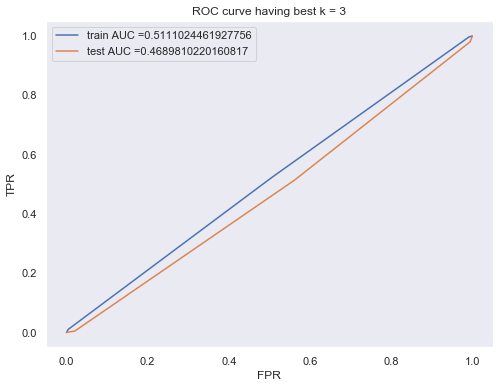

the maximum value of tpr*(1-fpr) 0.25829386159279744 for threshold 0.667


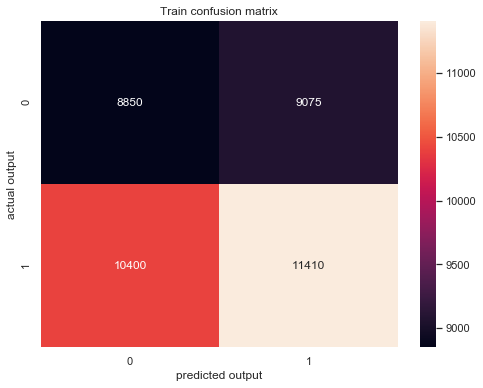

the maximum value of tpr*(1-fpr) 0.25829386159279744 for threshold 0.667
accuracy on train data: 0.5098779413615201
precision on train data: 0.5569929216499878
recall on train data: 0.5231545162769372
f1_score on train data: 0.539543681286204
the maximum value of tpr*(1-fpr) 0.22509772547748771 for threshold 0.667


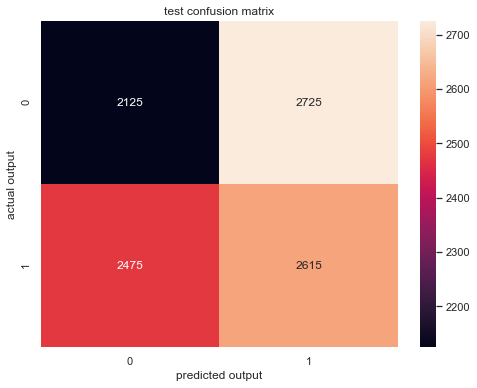

the maximum value of tpr*(1-fpr) 0.22509772547748771 for threshold 0.667
accuracy on test data: 0.4768611670020121
precision on test data: 0.4897003745318352
recall on test data: 0.5137524557956779
f1_score on test data: 0.5014381591562801


In [361]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()
scaler.fit(x_train_single_df)

x_train_norm = scaler.transform(x_train_single_df)
x_test_norm = scaler.transform(x_test_single_df)

model1 = MlModel()
best_k = model1.knn_model(x_train_norm, y_train_single_df)
model1.roc_curve_for_best_knn(x_train_norm, y_train_single_df, x_test_norm, y_test_single_df, best_k)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.541, total=  27.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.504, total=  27.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   55.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=  27.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=  28.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.543, total=  28.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.549, total=  28.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.541, total=  27.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.504, total=  27.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.548, total=  27.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  8.9min finished


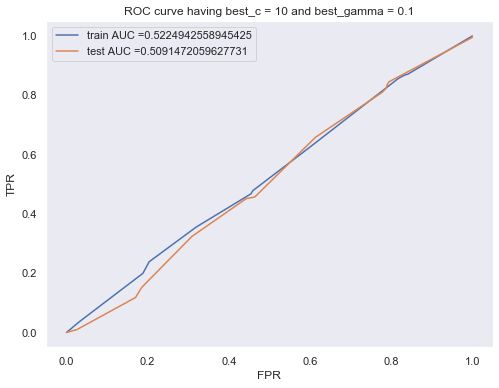

the maximum value of tpr*(1-fpr) 0.258662200556729 for threshold 0.554


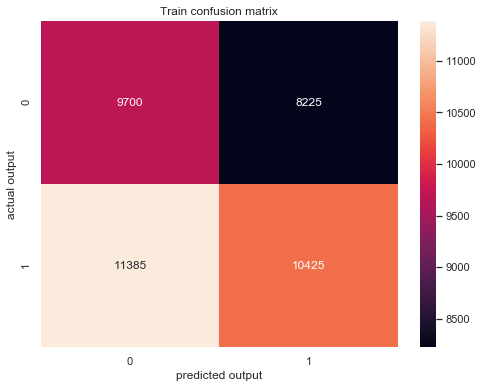

the maximum value of tpr*(1-fpr) 0.258662200556729 for threshold 0.554
accuracy on train data: 0.5064804328677488
precision on train data: 0.5589812332439679
recall on train data: 0.4779917469050894
f1_score on train data: 0.5153237765694513
the maximum value of tpr*(1-fpr) 0.2544406862050108 for threshold 0.554


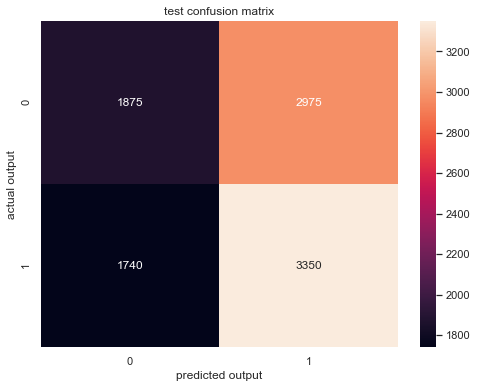

the maximum value of tpr*(1-fpr) 0.2544406862050108 for threshold 0.554
accuracy on test data: 0.5256539235412475
precision on test data: 0.5296442687747036
recall on test data: 0.6581532416502947
f1_score on test data: 0.5869469995619798


In [362]:
best_c, best_gamma = model1.svm_model(x_train_norm, y_train_single_df)
model1.roc_curve_for_best_svm(x_train_norm, y_train_single_df, x_test_norm, y_test_single_df, best_c, best_gamma)

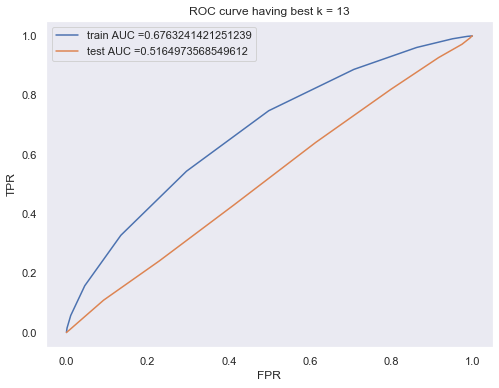

the maximum value of tpr*(1-fpr) 0.3830687163195264 for threshold 0.615


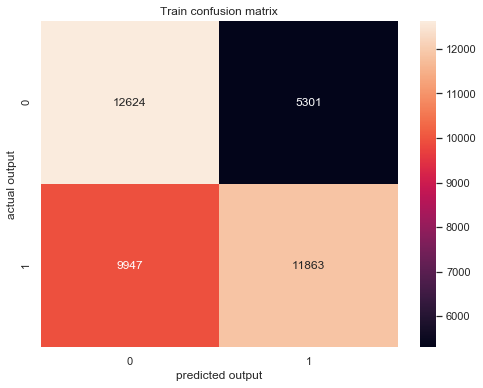

the maximum value of tpr*(1-fpr) 0.3830687163195264 for threshold 0.615
accuracy on train data: 0.616257707310935
precision on train data: 0.6911559077138196
recall on train data: 0.5439248051352591
f1_score on train data: 0.6087648175706881
the maximum value of tpr*(1-fpr) 0.25254580438701313 for threshold 0.615


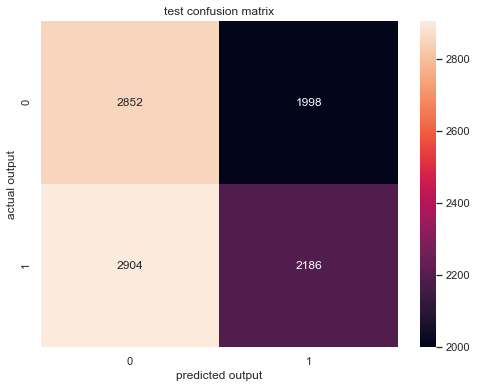

the maximum value of tpr*(1-fpr) 0.25254580438701313 for threshold 0.615
accuracy on test data: 0.506841046277666
precision on test data: 0.5224665391969407
recall on test data: 0.4294695481335953
f1_score on test data: 0.47142549061893463


In [363]:
model3 = MlModel()
best_k = model3.knn_model(x_tr_avg_w2v, y_train_single_df)
model3.roc_curve_for_best_knn(x_tr_avg_w2v, y_train_single_df, x_te_avg_w2v, y_test_single_df, best_k)

In [ ]:
best_c, best_gamma = model3.svm_model(x_tr_avg_w2v, y_train_single_df)

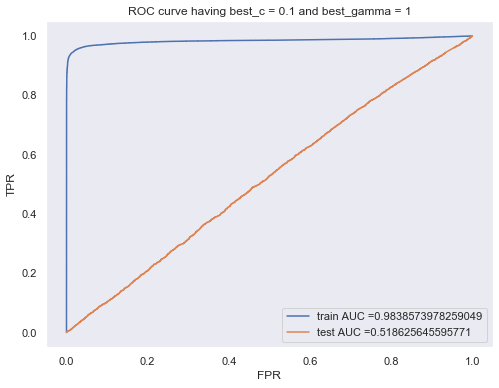

threshold length: 2218
fpr length: 2218
tpr length: 2218
the maximum value of tpr*(1-fpr) 0.9315801319497602 for threshold 0.547


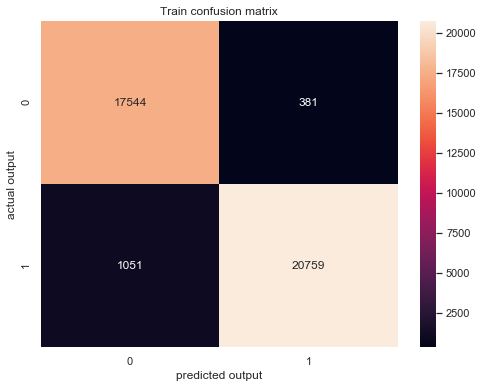

threshold length: 2218
fpr length: 2218
tpr length: 2218
the maximum value of tpr*(1-fpr) 0.9315801319497602 for threshold 0.547
accuracy on train data: 0.9639612432364414
precision on train data: 0.9819772942289499
recall on train data: 0.951811095827602
f1_score on train data: 0.9666589057043073
threshold length: 4836
fpr length: 4836
tpr length: 4836
the maximum value of tpr*(1-fpr) 0.2650892188037997 for threshold 0.554


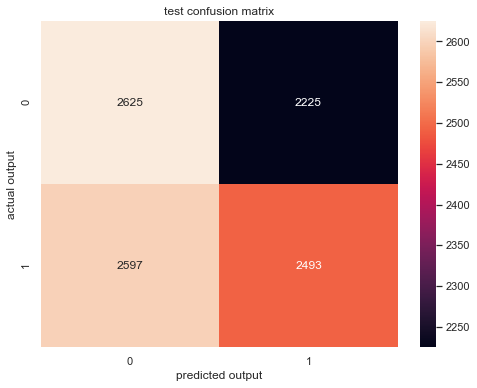

threshold length: 4836
fpr length: 4836
tpr length: 4836
the maximum value of tpr*(1-fpr) 0.2650892188037997 for threshold 0.554
accuracy on test data: 0.5148893360160965
precision on test data: 0.5284018651971174
recall on test data: 0.48978388998035366
f1_score on test data: 0.5083605220228384


In [131]:
model3.roc_curve_for_best_svm(x_tr_avg_w2v, y_train_single_df, x_te_avg_w2v, y_test_single_df, best_c, best_gamma)

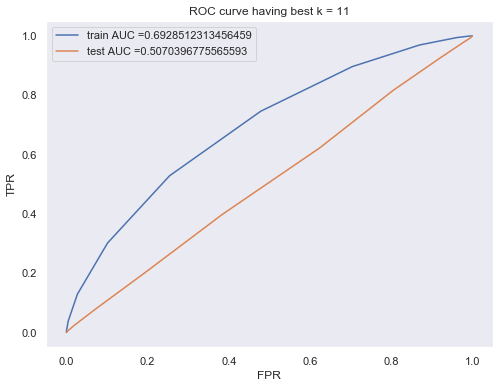

the maximum value of tpr*(1-fpr) 0.3942737206136169 for threshold 0.636


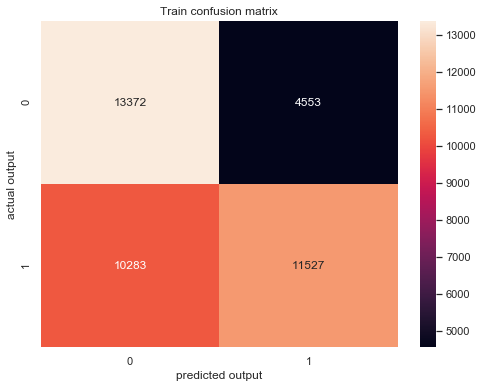

the maximum value of tpr*(1-fpr) 0.3942737206136169 for threshold 0.636
accuracy on train data: 0.6266263998993331
precision on train data: 0.7168532338308458
recall on train data: 0.5285190279688217
f1_score on train data: 0.608445500131961
the maximum value of tpr*(1-fpr) 0.24542134364936305 for threshold 0.636


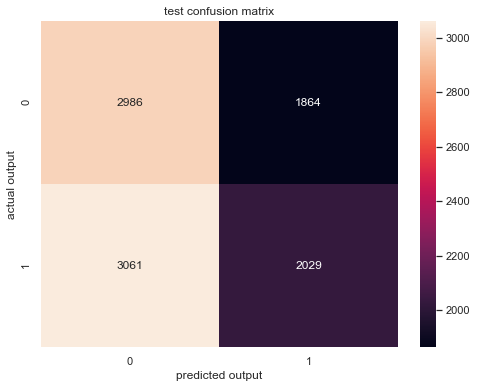

the maximum value of tpr*(1-fpr) 0.24542134364936305 for threshold 0.636
accuracy on test data: 0.5045271629778671
precision on test data: 0.5211918828666838
recall on test data: 0.3986247544204322
f1_score on test data: 0.4517421796727152


In [125]:
scaler = MinMaxScaler()
scaler.fit(x_tr_tfidf_w2v)

x_tr_tfidf_norm = scaler.transform(x_tr_tfidf_w2v)
x_te_tfidf_norm = scaler.transform(x_te_tfidf_w2v)

model4 = MlModel()
best_k = model4.knn_model(x_tr_tfidf_norm, y_train_single_df)
model4.roc_curve_for_best_knn(x_tr_tfidf_norm, y_train_single_df, x_te_tfidf_norm, y_test_single_df, best_k)

In [ ]:
best_c, best_gamma = model4.svm_model(x_tr_tfidf_w2v, y_train_single_df)

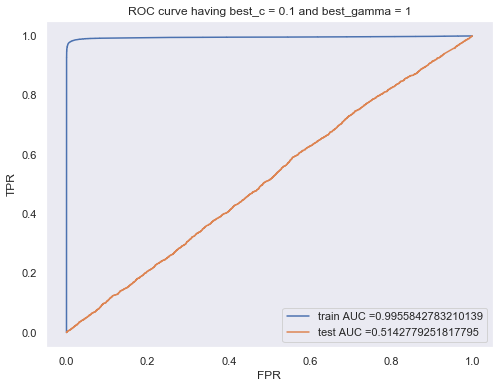

threshold length: 963
fpr length: 963
tpr length: 963
the maximum value of tpr*(1-fpr) 0.9715536422392707 for threshold 0.545


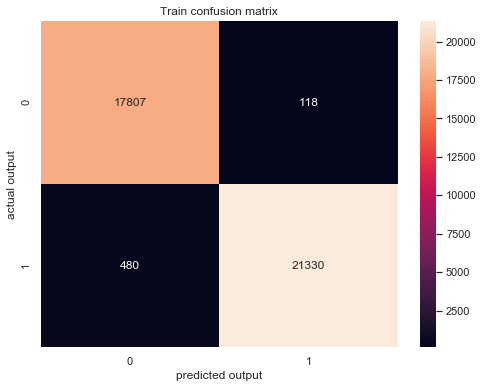

threshold length: 963
fpr length: 963
tpr length: 963
the maximum value of tpr*(1-fpr) 0.9715536422392707 for threshold 0.545
accuracy on train data: 0.9849502957090726
precision on train data: 0.9944983215218202
recall on train data: 0.9779917469050894
f1_score on train data: 0.9861759674511072
threshold length: 4886
fpr length: 4886
tpr length: 4886
the maximum value of tpr*(1-fpr) 0.2616424361493124 for threshold 0.549


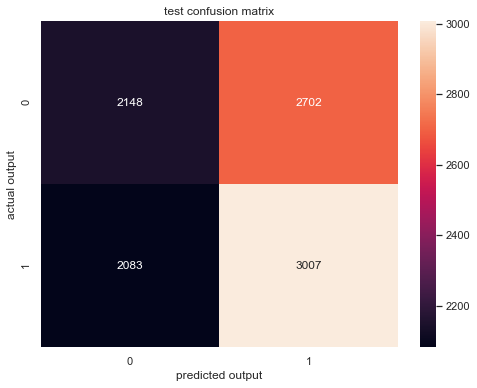

threshold length: 4886
fpr length: 4886
tpr length: 4886
the maximum value of tpr*(1-fpr) 0.2616424361493124 for threshold 0.549
accuracy on test data: 0.5186116700201208
precision on test data: 0.5267122087931336
recall on test data: 0.5907662082514735
f1_score on test data: 0.556903416983054


In [134]:
model4.roc_curve_for_best_svm(x_tr_tfidf_w2v, y_train_single_df, x_te_tfidf_w2v, y_test_single_df, best_c, best_gamma)

In [3]:
x = PrettyTable()

x.field_names = ["Model", "Data used", " text encoded", "train accuracy", "test accuracy"]
x.add_row(["knn", " stock data and news sentiment", "no text", "0.50", "0.47"])
x.add_row(["svm", " stock data and news sentiment", "no text", "0.50", "0.52"])
x.add_row(["knn", "stock data and news", "avgw2v", "0.61", "0.50"])
x.add_row(["svm", "stock data and news", "avgw2v", "0.96", "0.51"])
x.add_row(["knn", "stock data and news", "tfidf", "0.62", "0.50"])
x.add_row(["svm", "stock data and news", "tfidf", "0.98", "0.51"])

print(x)

+-------+--------------------------------+---------------+----------------+---------------+
| Model |           Data used            |  text encoded | train accuracy | test accuracy |
+-------+--------------------------------+---------------+----------------+---------------+
|  knn  |  stock data and news sentiment |    no text    |      0.50      |      0.47     |
|  svm  |  stock data and news sentiment |    no text    |      0.50      |      0.52     |
|  knn  |      stock data and news       |     avgw2v    |      0.61      |      0.50     |
|  svm  |      stock data and news       |     avgw2v    |      0.96      |      0.51     |
|  knn  |      stock data and news       |     tfidf     |      0.62      |      0.50     |
|  svm  |      stock data and news       |     tfidf     |      0.98      |      0.51     |
+-------+--------------------------------+---------------+----------------+---------------+


### <font color = 'blue'> Applying deep learning model </font>

In [117]:
x_news = np.append(x_train_news, x_test_news)
y_label = np.append(y_train_single, y_test_single)
x_move_close = np.append(x_train_single[:, 0], x_test_single[:, 0]) 
x_move_open = np.append(x_train_single[:, 1], x_test_single[:, 1]) 
x_move_high = np.append(x_train_single[:, 2], x_test_single[:, 2])
x_move_low = np.append(x_train_single[:, 3], x_test_single[:, 3])
x_move_close_open = np.append(x_train_single[:, 4], x_test_single[:, 4])

In [125]:
news_class_df = pd.DataFrame()
news_class_df['news'] = x_news
news_class_df['move_close'] = x_move_close
news_class_df['move_open'] = x_move_open
news_class_df['move_high'] = x_move_high
news_class_df['move_low'] = x_move_low
news_class_df['move_close_open'] = x_move_close_open
news_class_df['class_label'] = y_label

In [126]:
news_class_df.head()

,news,move_close,move_open,move_high,move_low,move_close_open,class_label
0,why wont america nato help us if wont help us ...,-1,1,-1,1,1,0
1,bush puts foot georgian conflict,-1,1,-1,1,1,0
2,jewish georgian minister thanks israeli traini...,-1,1,-1,1,1,0
3,georgian army flees disarray russians advance ...,-1,1,-1,1,1,0
4,olympic opening ceremony fireworks faked,-1,1,-1,1,1,0


In [98]:
class DlModel():
    
    def __init__(self, data_file, x_column, validation_split=0.1, top_words = 2000):
        self.top_words = top_words
        self.validation_split = validation_split
        self.df = data_file
        self.news = self.df[x_column]
        self.tokenizer = Tokenizer(top_words)
        self.tokenizer.fit_on_texts(self.news)
        self.all_x = self.tokenizer.texts_to_sequences(self.news)
        self.all_y = self.df[y_column]
    
    def load_data(self, y_column):
        np.random.seed(0)
        idx = np.arange(len(self.all_x))
        np.random.shuffle(idx)
        self.all_x = np.array(self.all_x)[idx]
        self.all_y = np.array(self.all_y)[idx]
        split = int(self.validation_split * len(self.all_x))
        training_text_x = self.all_x[split:]
        training_y = self.all_y[split:]
        validation_text_x = self.all_x[:split]        
        validation_y = self.all_y[:split]
        
        training_cat_x = self.df[['move_close', 'move_open', 'move_high', 'move_low', 'move_close_open']].values[split:]
        validation_cat_x = self.df[['move_close', 'move_open', 'move_high', 'move_low', 'move_close_open']].values[:split]
        
        np.random.seed(None)
        return (training_text_x, validation_text_x), (training_cat_x, validation_cat_x), ( training_y, validation_y)
    
    def model_train(self, x_column, y_column):
        #reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto')
        #checkpoint = ModelCheckpoint(model_name, monitor='val_acc', mode='auto', verbose=1, save_best_only=True)
        #https://www.tensorflow.org/tensorboard/get_started

        # defining log_dir and tensorboard_call back for storing log files
        log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        headlines = self.df[x_column]
        top_words = 2000

        # load the dataset but only keep the top n words, zero the rest
        (X1_train, X1_test), (X2_train, X2_test), (Y_train, Y_test) = self.load_data(y_column)
        print(X1_train.shape)
        print(X2_train.shape)
        
        max_review_length = 100
        X1_train = sequence.pad_sequences(X1_train, maxlen=max_review_length)
        X1_test = sequence.pad_sequences(X1_test, maxlen=max_review_length)
        # create the model
        
        embedding_vecor_length = 32
        
        input_1 = Input(shape=(max_review_length,))
        input_2 = Input(shape=(5,))
        
        embedding_layer = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input_1)
        conv_layer = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(embedding_layer)
        max_pool_layer = MaxPooling1D(pool_size=2)(conv_layer)
        lstm_layer = LSTM(100)(max_pool_layer)
        
        dense_layer_1 = Dense(10, activation='relu')(input_2)
        dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
        
        concat_layer = Concatenate()([lstm_layer, dense_layer_2])
        output_layer = Dense(1, activation='sigmoid')(concat_layer)
        
        model = Model(inputs = [input_1, input_2], outputs = output_layer)
        optimizer = Adam(lr=1e-3)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
        print(model.summary())
        #plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

        model.fit(x=[X1_train, X2_train], y=Y_train, validation_split=0.02, \
                  epochs=100, batch_size=64, callbacks=[tensorboard_callback])
        scores = model.evaluate([X1_test, X2_test], Y_test, verbose=0)
        print(scores)
        y_train_prob = model.predict([X1_train, X2_train])
        
        class_label = lambda x: 1 if(x>=0.5) else 0
        y_train_predict = np.array([class_label(xi) for xi in y_train_prob])
        
        y_test_prob = model.predict([X1_test, X2_test])
        y_test_predict = np.array([class_label(xi) for xi in y_test_prob])
        
        train_matrix = confusion_matrix(Y_train, y_train_predict)
        ax = sns.heatmap(train_matrix, annot = True, fmt="d")
        ax.set(xlabel = "predicted output", ylabel = "actual output")
        plt.show()
        
        print('accuracy on train data:', accuracy_score(Y_train, y_train_predict))
        print('precision on train data:', precision_score(Y_train, y_train_predict))
        print('recall on train data:', recall_score(Y_train, y_train_predict))
        print('f1_score on train data:', f1_score(Y_train, y_train_predict))
        
        print("="*50)
        test_matrix = confusion_matrix(Y_test, y_test_predict)
        ax = sns.heatmap(test_matrix, annot = True, fmt = "d")
        ax.set(xlabel = "predicted output", ylabel = "actual output")
        plt.show()
        
        print('accuracy on test data:', accuracy_score(Y_test, y_test_predict))
        print('precision on test data:', precision_score(Y_test, y_test_predict))
        print('recall on test data:', recall_score(Y_test, y_test_predict))
        print('f1_score on test data:', f1_score(Y_test, y_test_predict))
        
        #print(scores)
        
        return model

In [137]:
dl_model = DlModel(news_class_df, 'news')

(44708,)
(44708, 5)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 100, 32)      64000       input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 100, 32)      3104        embedding_3[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 5)            0                                            
________________________________________________________________________

43813/43813 [==============================] - 47s 1ms/step - loss: 0.0143 - accuracy: 0.9937 - val_loss: 6.0777 - val_accuracy: 0.4939
Epoch 94/100
43813/43813 [==============================] - 47s 1ms/step - loss: 0.0149 - accuracy: 0.9939 - val_loss: 5.9846 - val_accuracy: 0.4983
Epoch 95/100
43813/43813 [==============================] - 48s 1ms/step - loss: 0.0141 - accuracy: 0.9940 - val_loss: 6.0964 - val_accuracy: 0.4927
Epoch 96/100
43813/43813 [==============================] - 48s 1ms/step - loss: 0.0144 - accuracy: 0.9936 - val_loss: 6.1549 - val_accuracy: 0.5017
Epoch 97/100
43813/43813 [==============================] - 48s 1ms/step - loss: 0.0160 - accuracy: 0.9932 - val_loss: 6.1741 - val_accuracy: 0.4961
Epoch 98/100
43813/43813 [==============================] - 48s 1ms/step - loss: 0.0139 - accuracy: 0.9938 - val_loss: 6.2652 - val_accuracy: 0.5039
Epoch 99/100
43813/43813 [==============================] - 48s 1ms/step - loss: 0.0163 - accuracy: 0.9931 - val_loss: 

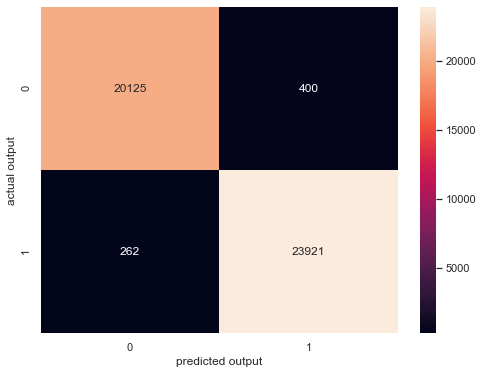

accuracy on train data: 0.9851928066565268
precision on train data: 0.9835533078409605
recall on train data: 0.9891659430178225
f1_score on train data: 0.9863516411017649


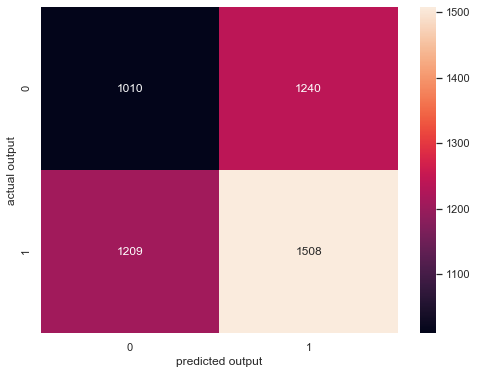

accuracy on test data: 0.5069458425609019
precision on test data: 0.5487627365356623
recall on test data: 0.5550239234449761
f1_score on test data: 0.551875571820677


In [138]:
model = dl_model.model_train('news', 'class_label')

In [ ]:
#plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

## <font color ='blue'>Applying Models for a specific company(Microsoft) with specific headlines</font>

In [40]:
data_path = '../DataSet/'

df_msft = pd.read_csv(data_path + 'Microsoft/MSFT.txt')
df_news = pd.read_csv(data_path + 'news/uci-news-aggregator.csv')

In [41]:
df_msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-03,37.919998,38.130001,37.490002,37.779999,32.998386,29717500
1,2014-03-04,38.200001,38.480000,38.070000,38.410000,33.548656,26802400
2,2014-03-05,38.250000,38.270000,37.930000,38.110001,33.286617,20520100
3,2014-03-06,38.139999,38.240002,37.889999,38.150002,33.321556,23582200
4,2014-03-07,38.279999,38.360001,37.689999,37.900002,33.103210,26591600


In [42]:
df_news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [43]:
df_msft_copy = df_msft[(df_msft['Date'] > '2014-03-09') & (df_msft['Date'] < '2014-08-29')].copy()

df_msft_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5,2014-03-10,37.990002,38.009998,37.720001,37.820000,33.033325,19006600
6,2014-03-11,37.869999,38.230000,37.720001,38.020000,33.208008,25216400
7,2014-03-12,37.799999,38.430000,37.790001,38.270000,33.426369,30494100
8,2014-03-13,38.419998,38.450001,37.639999,37.889999,33.094460,32169700
9,2014-03-14,37.650002,38.139999,37.509998,37.700001,32.928516,27195600


In [44]:
df_technology = df_news[df_news['CATEGORY'] == 't']
df_technology = df_technology[df_technology['TITLE'].str.contains('microsoft', case=False)]
sLength = len(df_technology['TIMESTAMP'])

df_technology['TIMESTAMP'] = df_technology['TIMESTAMP'].apply(
    lambda x: datetime.fromtimestamp(int(int(x)/1000)).strftime('%Y-%m-%d'))

In [45]:
df_technology.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
946,947,Respawn: Titanfall's server stability is in Mi...,http://www.joystiq.com/2014/03/10/respawn-tita...,Joystiq,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.joystiq.com,2014-03-11
953,954,"'Titanfall' launches Tuesday, Microsoft hopes ...",http://www.upi.com/Business_News/2014/03/10/Ti...,UPI.com,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.upi.com,2014-03-11
957,958,"Microsoft: Titanfall could be a ""game changer""...",http://www.neoseeker.com/news/24819-microsoft-...,Neoseeker,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.neoseeker.com,2014-03-11
960,961,Titanfall Xbox One Launch: Microsoft Releases ...,http://www.latinpost.com/articles/8677/2014031...,Latin Post,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.latinpost.com,2014-03-11
966,967,Microsoft Xbox One Titanfall Another Non-1080p...,http://www.valuewalk.com/2014/03/microsoft-xbo...,ValueWalk,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.valuewalk.com,2014-03-11


In [46]:
def findStockChange(row, dataset = df_msft_copy, dateOffset = 0):
    currentstockDay = None
    date = datetime.strptime(row, '%Y-%m-%d')
    date = date + dt.timedelta(days=dateOffset)
    row = date.strftime('%Y-%m-%d')
    currentstockDay = dataset[dataset['Date'] == row]
    if not currentstockDay.empty:
        return currentstockDay.iloc[0]['Close'] > currentstockDay.iloc[0]['Open']
    else:
        return False

In [47]:
df_technology.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
946,947,Respawn: Titanfall's server stability is in Mi...,http://www.joystiq.com/2014/03/10/respawn-tita...,Joystiq,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.joystiq.com,2014-03-11
953,954,"'Titanfall' launches Tuesday, Microsoft hopes ...",http://www.upi.com/Business_News/2014/03/10/Ti...,UPI.com,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.upi.com,2014-03-11
957,958,"Microsoft: Titanfall could be a ""game changer""...",http://www.neoseeker.com/news/24819-microsoft-...,Neoseeker,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.neoseeker.com,2014-03-11
960,961,Titanfall Xbox One Launch: Microsoft Releases ...,http://www.latinpost.com/articles/8677/2014031...,Latin Post,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.latinpost.com,2014-03-11
966,967,Microsoft Xbox One Titanfall Another Non-1080p...,http://www.valuewalk.com/2014/03/microsoft-xbo...,ValueWalk,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.valuewalk.com,2014-03-11


In [48]:
df_technology['tomorrow'] = df_technology['TIMESTAMP'].apply(lambda row: findStockChange(row, dateOffset=1)).astype(np.int32)

In [49]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_headlines = []
# tqdm is for printing the status bar
for sentance in tqdm(df_technology['TITLE'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('b\"', ' ')
    sent = sent.replace('b\'', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_headlines.append(sent.lower().strip())

100%|██████████| 6449/6449 [00:00<00:00, 15474.06it/s]


In [50]:
df_technology['normalized_title'] = preprocessed_headlines

In [51]:
df_technology.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,tomorrow,normalized_title
946,947,Respawn: Titanfall's server stability is in Mi...,http://www.joystiq.com/2014/03/10/respawn-tita...,Joystiq,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.joystiq.com,2014-03-11,1,respawn titanfall server stability microsoft a...
953,954,"'Titanfall' launches Tuesday, Microsoft hopes ...",http://www.upi.com/Business_News/2014/03/10/Ti...,UPI.com,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.upi.com,2014-03-11,1,titanfall launches tuesday microsoft hopes boo...
957,958,"Microsoft: Titanfall could be a ""game changer""...",http://www.neoseeker.com/news/24819-microsoft-...,Neoseeker,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.neoseeker.com,2014-03-11,1,microsoft titanfall could game changer xbox one
960,961,Titanfall Xbox One Launch: Microsoft Releases ...,http://www.latinpost.com/articles/8677/2014031...,Latin Post,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.latinpost.com,2014-03-11,1,titanfall xbox one launch microsoft releases c...
966,967,Microsoft Xbox One Titanfall Another Non-1080p...,http://www.valuewalk.com/2014/03/microsoft-xbo...,ValueWalk,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.valuewalk.com,2014-03-11,1,microsoft xbox one titanfall another non 1080p...


In [52]:
df_msft_temp = df_msft[df_msft['Date'].isin(df_technology['TIMESTAMP'].values)].copy()

In [53]:
df_msft_temp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
6,2014-03-11,37.869999,38.230000,37.720001,38.020000,33.208008,25216400
7,2014-03-12,37.799999,38.430000,37.790001,38.270000,33.426369,30494100
8,2014-03-13,38.419998,38.450001,37.639999,37.889999,33.094460,32169700
10,2014-03-17,37.900002,38.410000,37.790001,38.049999,33.234211,20479600
11,2014-03-18,38.259998,39.900002,38.220001,39.549999,34.544369,64063900


In [54]:
# initialising the variables for discritising stock prices
df_msft_temp['move_close'] = [0] * df_msft_temp.shape[0]
df_msft_temp['move_open'] = [0] * df_msft_temp.shape[0]
df_msft_temp['move_high'] = [0] * df_msft_temp.shape[0]
df_msft_temp['move_low'] = [0] * df_msft_temp.shape[0]
df_msft_temp['move_close_open'] = [0]*df_msft_temp.shape[0]

In [55]:
df_msft_temp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,move_close,move_open,move_high,move_low,move_close_open
6,2014-03-11,37.869999,38.230000,37.720001,38.020000,33.208008,25216400,0,0,0,0,0
7,2014-03-12,37.799999,38.430000,37.790001,38.270000,33.426369,30494100,0,0,0,0,0
8,2014-03-13,38.419998,38.450001,37.639999,37.889999,33.094460,32169700,0,0,0,0,0
10,2014-03-17,37.900002,38.410000,37.790001,38.049999,33.234211,20479600,0,0,0,0,0
11,2014-03-18,38.259998,39.900002,38.220001,39.549999,34.544369,64063900,0,0,0,0,0


In [56]:
#Class label creating
for index in range(df_msft_temp.shape[0]):
    # checking whether close price is greater tha open price or not
    if df_msft_temp['Close'].iloc[index] >= df_msft_temp['Open'].iloc[index]:
        df_msft_temp['move_close_open'].iloc[index] = 1
    else:
        df_msft_temp['move_close_open'].iloc[index] = 0

# Creating the discritised features
for index in range(df_msft_temp.shape[0]):
    if index == 0:
        if df_msft_temp['Close'].iloc[index] >= df_msft[df_msft['Date'] == '2014-03-10']['Close'].values[0]:
            df_msft_temp['move_close'].iloc[index] = 1
        else:
            df_msft_temp['move_close'].iloc[index] = 0
            
    elif df_msft_temp['Close'].iloc[index] >= df_msft_temp['Close'].iloc[index-1]:
        #print("Hi")
        df_msft_temp['move_close'].iloc[index] = 1
    else:
        df_msft_temp['move_close'].iloc[index] = 0

        
for index in range(df_msft_temp.shape[0]):
    if index == 0:
        if df_msft_temp['Open'].iloc[index] >= df_msft[df_msft['Date'] == '2014-03-10']['Close'].values[0]:
            df_msft_temp['move_open'].iloc[index] = 1
        else:
            df_msft_temp['move_open'][index] = 0      

    elif df_msft_temp['Open'].iloc[index] >= df_msft_temp['Close'].iloc[index-1]:
        df_msft_temp['move_open'].iloc[index] = 1
    else:
        df_msft_temp['move_open'].iloc[index] = 0

for index in range(df_msft_temp.shape[0]):
    if index == 0:
        if df_msft_temp['High'].iloc[index] >= df_msft[df_msft['Date'] == '2014-03-10']['Close'].values[0]:
            df_msft_temp['move_high'].iloc[index] = 1
        else:
            df_msft_temp['move_high'].iloc[index] = 0
            
    elif df_msft_temp['High'].iloc[index] >= df_msft_temp['Close'].iloc[index-1]:
        df_msft_temp['move_high'].iloc[index] = 1
        
    else:
        df_msft_temp['move_high'].iloc[index] = 0

for index in range(df_msft_temp.shape[0]):
    if index == 0:
        if df_msft_temp['Low'].iloc[index] >= df_msft[df_msft['Date'] == '2014-03-10']['Close'].values[0]:
            df_msft_temp['move_low'].iloc[index] = 1
        else:
            df_msft_temp['move_low'].iloc[index] = 0
        
    elif df_msft_temp['Low'].iloc[index] >= df_msft_temp['Close'].iloc[index-1]:
        df_msft_temp['move_low'].iloc[index] = 1
        
    else:
        df_msft_temp['move_low'].iloc[index] = 0


In [57]:
df_msft_temp.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,move_close,move_open,move_high,move_low,move_close_open
6,2014-03-11,37.869999,38.230000,37.720001,38.020000,33.208008,25216400,1,1,1,0,1
7,2014-03-12,37.799999,38.430000,37.790001,38.270000,33.426369,30494100,1,0,1,0,1
8,2014-03-13,38.419998,38.450001,37.639999,37.889999,33.094460,32169700,0,1,1,0,0
10,2014-03-17,37.900002,38.410000,37.790001,38.049999,33.234211,20479600,1,1,1,0,1
11,2014-03-18,38.259998,39.900002,38.220001,39.549999,34.544369,64063900,1,1,1,1,1


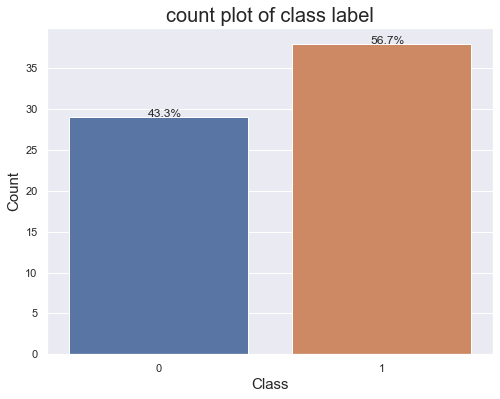

In [58]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set(style="darkgrid")
ax = sns.countplot(x="move_close_open", data=df_msft_temp)
ax.set_title('count plot of class label', {'fontsize': 20})
ax.set_xlabel('Class', {'fontsize': 15})
ax.set_ylabel('Count', {'fontsize': 15})

#counting the number of each level in move_open feature
counts = df_msft_temp.move_close_open.value_counts()
without_hue(ax, counts)

In [59]:
def add_move_close(row, dataset = df_msft_temp):

    currentStockday = dataset[dataset['Date'] == row]['move_close']
    if not currentStockday.empty:
        return currentStockday.values[0]
    else:
        return 0

def add_move_open(row, dataset = df_msft_temp):
    currentStockday = dataset[dataset['Date'] == row]['move_open']
    if not currentStockday.empty:
        return currentStockday.values[0]
    else:
        return 0
    
def add_move_high(row, dataset = df_msft_temp):
    currentStockday = dataset[dataset['Date'] == row]['move_high']
    if not currentStockday.empty:
        return currentStockday.values[0]
    else:
        return 0

def add_move_low(row, dataset = df_msft_temp):
    currentStockday = dataset[dataset['Date'] == row]['move_low']
    if not currentStockday.empty:
        return currentStockday.values[0]
    else:
        return 0

def add_move_close_open(row, dataset = df_msft_temp):
    currentStockday = dataset[dataset['Date'] == row]['move_close_open']
    if not currentStockday.empty:
        return currentStockday.values[0]
    else:
        return 0

In [60]:
# initialising the variables for discritising stock prices
df_technology['move_close'] = [0] * df_technology.shape[0]
df_technology['move_open'] = [0] * df_technology.shape[0]
df_technology['move_high'] = [0] * df_technology.shape[0]
df_technology['move_low'] = [0] * df_technology.shape[0]
df_technology['move_close_open'] = [0]*df_technology.shape[0]

In [61]:
df_technology['move_close'] = df_technology['TIMESTAMP'].apply(lambda row: add_move_close(row))
df_technology['move_open'] = df_technology['TIMESTAMP'].apply(lambda row: add_move_open(row))
df_technology['move_high'] = df_technology['TIMESTAMP'].apply(lambda row: add_move_high(row))
df_technology['move_low'] = df_technology['TIMESTAMP'].apply(lambda row: add_move_low(row))
df_technology['move_close_open'] = df_technology['TIMESTAMP'].apply(lambda row: add_move_close_open(row))

In [62]:
df_technology.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,tomorrow,normalized_title,move_close,move_open,move_high,move_low,move_close_open
946,947,Respawn: Titanfall's server stability is in Mi...,http://www.joystiq.com/2014/03/10/respawn-tita...,Joystiq,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.joystiq.com,2014-03-11,1,respawn titanfall server stability microsoft a...,1,1,1,0,1
953,954,"'Titanfall' launches Tuesday, Microsoft hopes ...",http://www.upi.com/Business_News/2014/03/10/Ti...,UPI.com,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.upi.com,2014-03-11,1,titanfall launches tuesday microsoft hopes boo...,1,1,1,0,1
957,958,"Microsoft: Titanfall could be a ""game changer""...",http://www.neoseeker.com/news/24819-microsoft-...,Neoseeker,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.neoseeker.com,2014-03-11,1,microsoft titanfall could game changer xbox one,1,1,1,0,1
960,961,Titanfall Xbox One Launch: Microsoft Releases ...,http://www.latinpost.com/articles/8677/2014031...,Latin Post,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.latinpost.com,2014-03-11,1,titanfall xbox one launch microsoft releases c...,1,1,1,0,1
966,967,Microsoft Xbox One Titanfall Another Non-1080p...,http://www.valuewalk.com/2014/03/microsoft-xbo...,ValueWalk,t,dw0Jnfj8vEPaLZM8TQMSCbVaYeyrM,www.valuewalk.com,2014-03-11,1,microsoft xbox one titanfall another non 1080p...,1,1,1,0,1


In [104]:
df_technology.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP', 'tomorrow', 'normalized_title', 'move_close', 'move_open',
       'move_high', 'move_low', 'move_close_open'],
      dtype='object')

In [108]:
df_technology[['tomorrow', 'normalized_title', 'move_close', 'move_open',
       'move_high', 'move_low', 'move_close_open']].to_csv('file1.csv', header=True, index=False) 

In [63]:
train_news_positive = df_technology.normalized_title[df_technology.tomorrow == 1]
train_news_positive_combined = ""
for news in train_news_positive:
    train_news_positive_combined = train_news_positive_combined + " " + news

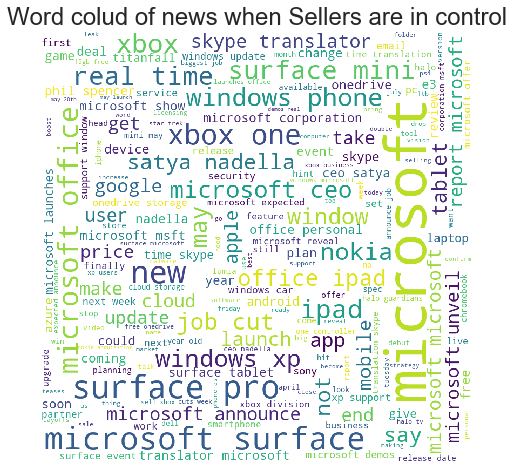

In [64]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(train_news_positive_combined) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word colud of news when Sellers are in control", size = 24)
  
plt.show()

In [65]:
train_news_negative = df_technology.normalized_title[df_technology.tomorrow == 1]
train_news_negative_combined = ""
for news in train_news_negative:
    train_news_negative_combined = train_news_negative_combined + " " + news

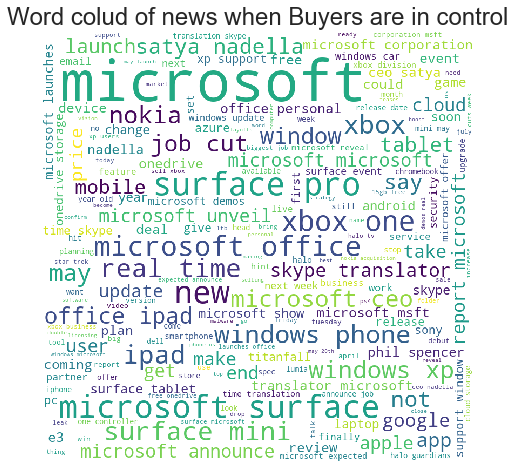

In [66]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(train_news_negative_combined) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word colud of news when Buyers are in control", size = 24)
  
plt.show()

In [99]:
dl_model2 = DlModel(df_technology, 'normalized_title')

In [73]:
tf.config.experimental_run_functions_eagerly(True)

(5805,)
(5805, 5)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 100, 32)      64000       input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 100, 32)      3104        embedding_5[0][0]                
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________

5688/5688 [==============================] - 7s 1ms/step - loss: 0.0285 - accuracy: 0.9856 - val_loss: 1.1839 - val_accuracy: 0.7949
Epoch 40/100
5688/5688 [==============================] - 8s 1ms/step - loss: 0.0289 - accuracy: 0.9844 - val_loss: 1.2322 - val_accuracy: 0.7863
Epoch 41/100
5688/5688 [==============================] - 8s 1ms/step - loss: 0.0288 - accuracy: 0.9851 - val_loss: 1.1764 - val_accuracy: 0.7949
Epoch 42/100
5688/5688 [==============================] - 8s 1ms/step - loss: 0.0285 - accuracy: 0.9844 - val_loss: 1.3618 - val_accuracy: 0.7863
Epoch 43/100
5688/5688 [==============================] - 8s 1ms/step - loss: 0.0285 - accuracy: 0.9840 - val_loss: 1.1418 - val_accuracy: 0.8034
Epoch 44/100
5688/5688 [==============================] - 9s 2ms/step - loss: 0.0279 - accuracy: 0.9847 - val_loss: 1.1685 - val_accuracy: 0.8291
Epoch 45/100
5688/5688 [==============================] - 8s 1ms/step - loss: 0.0273 - accuracy: 0.9859 - val_loss: 1.2056 - val_accuracy

5688/5688 [==============================] - 7s 1ms/step - loss: 0.0190 - accuracy: 0.9875 - val_loss: 1.9744 - val_accuracy: 0.7949
Epoch 96/100
5688/5688 [==============================] - 7s 1ms/step - loss: 0.0192 - accuracy: 0.9870 - val_loss: 1.9563 - val_accuracy: 0.7863
Epoch 97/100
5688/5688 [==============================] - 7s 1ms/step - loss: 0.0197 - accuracy: 0.9873 - val_loss: 1.9138 - val_accuracy: 0.7949
Epoch 98/100
5688/5688 [==============================] - 7s 1ms/step - loss: 0.0186 - accuracy: 0.9880 - val_loss: 2.0831 - val_accuracy: 0.8120
Epoch 99/100
5688/5688 [==============================] - 7s 1ms/step - loss: 0.0193 - accuracy: 0.9879 - val_loss: 2.0507 - val_accuracy: 0.7863
Epoch 100/100
5688/5688 [==============================] - 7s 1ms/step - loss: 0.0190 - accuracy: 0.9882 - val_loss: 2.1142 - val_accuracy: 0.8034
[2.086272441104871, 0.7701863646507263]


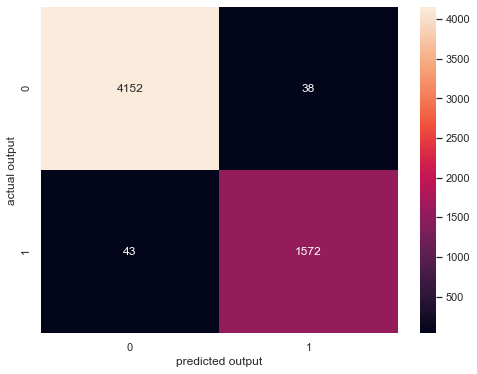

accuracy on train data: 0.986046511627907
precision on train data: 0.9763975155279503
recall on train data: 0.973374613003096
f1_score on train data: 0.9748837209302326


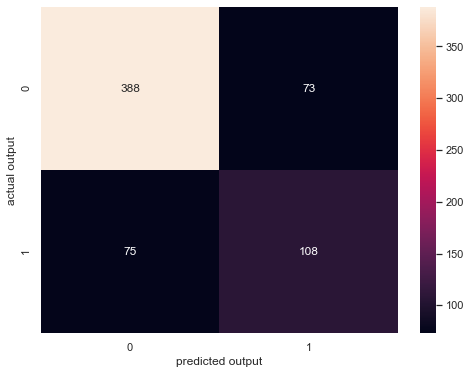

accuracy on test data: 0.7701863354037267
precision on test data: 0.5966850828729282
recall on test data: 0.5901639344262295
f1_score on test data: 0.5934065934065934


In [100]:
model = dl_model2.model_train('normalized_title', 'tomorrow')

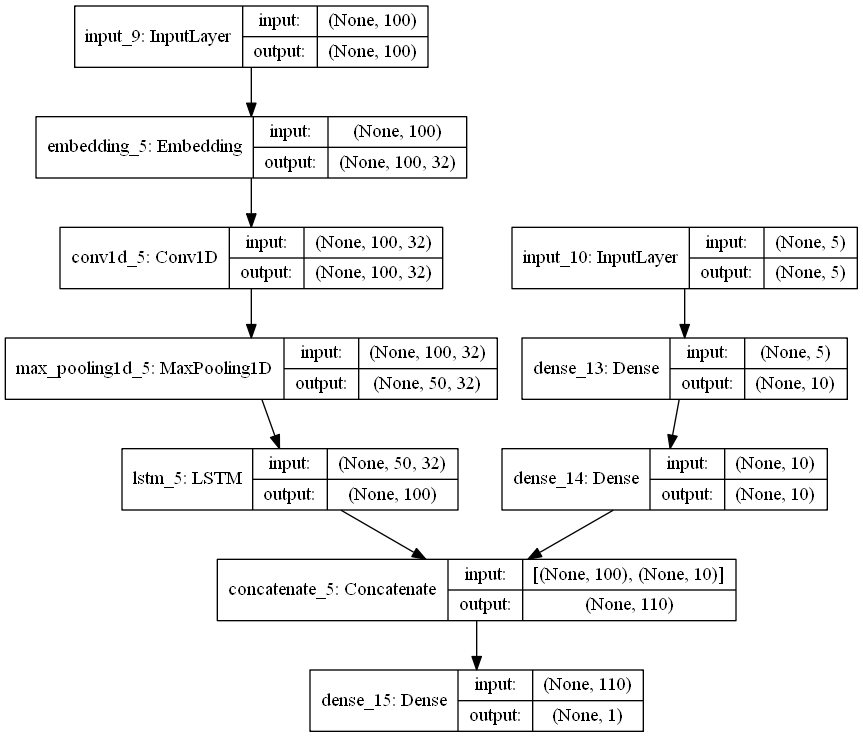

In [101]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [109]:
#https://www.tensorflow.org/tutorials/keras/save_and_load
model.save('saved_model/final_model')

# <font color = 'blue'> Conclusion </font>

1. After applying different models with different datasests. It seems that the deep learning model aplied with dataset containing the company's specific headlines gave the good accuracy.  
2. Similarly we can use twitter tweets about the speicific company and the tweets of biggest investors of the company to increase the accuracy.
3. After eperimenting with the models it seems that the stock market prediction is very difficult. The model varies with the company.  